# **Taxi Demand Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#*importing libraries
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import folium
import time
from datetime import datetime
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#*reading the data
#month_df = dd.read_csv('/content/drive/My Drive/Applied AI/Case Studies/2. Taxi Demand Prediction/Copy of yellow_tripdata_2015-01.csv')
month_df = dd.read_csv('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/Copy of yellow_tripdata_2015-01.csv')
print(month_df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


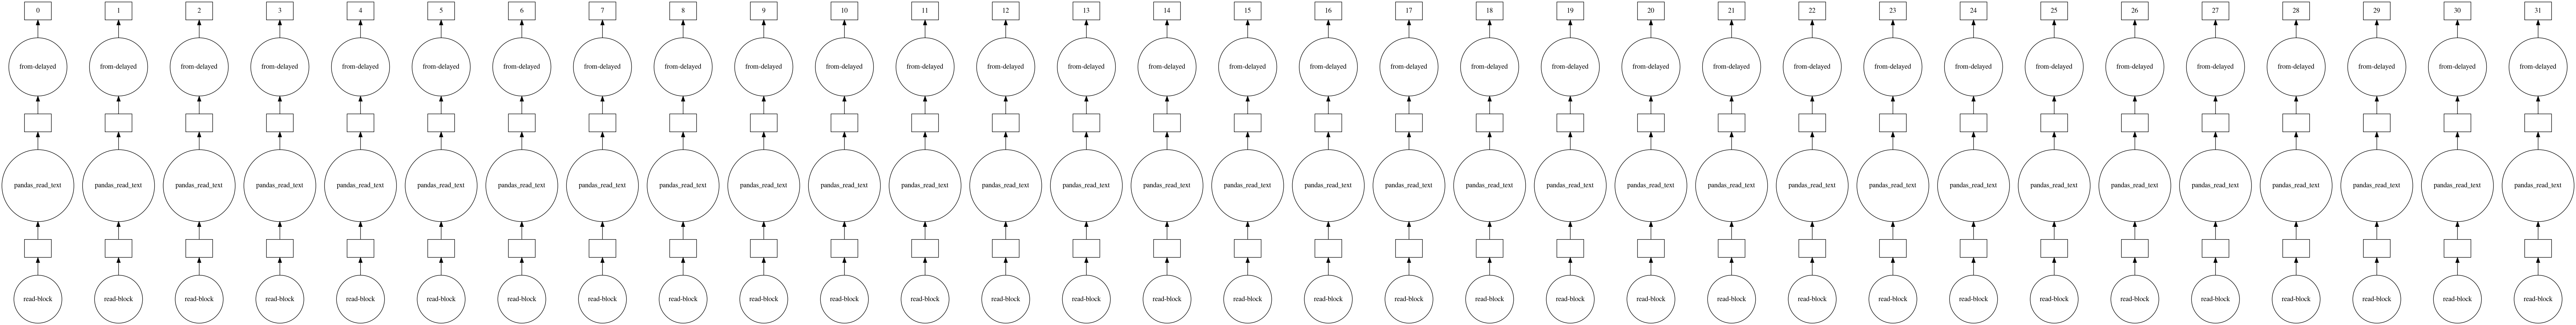

In [ ]:
#*
month_df.visualize()

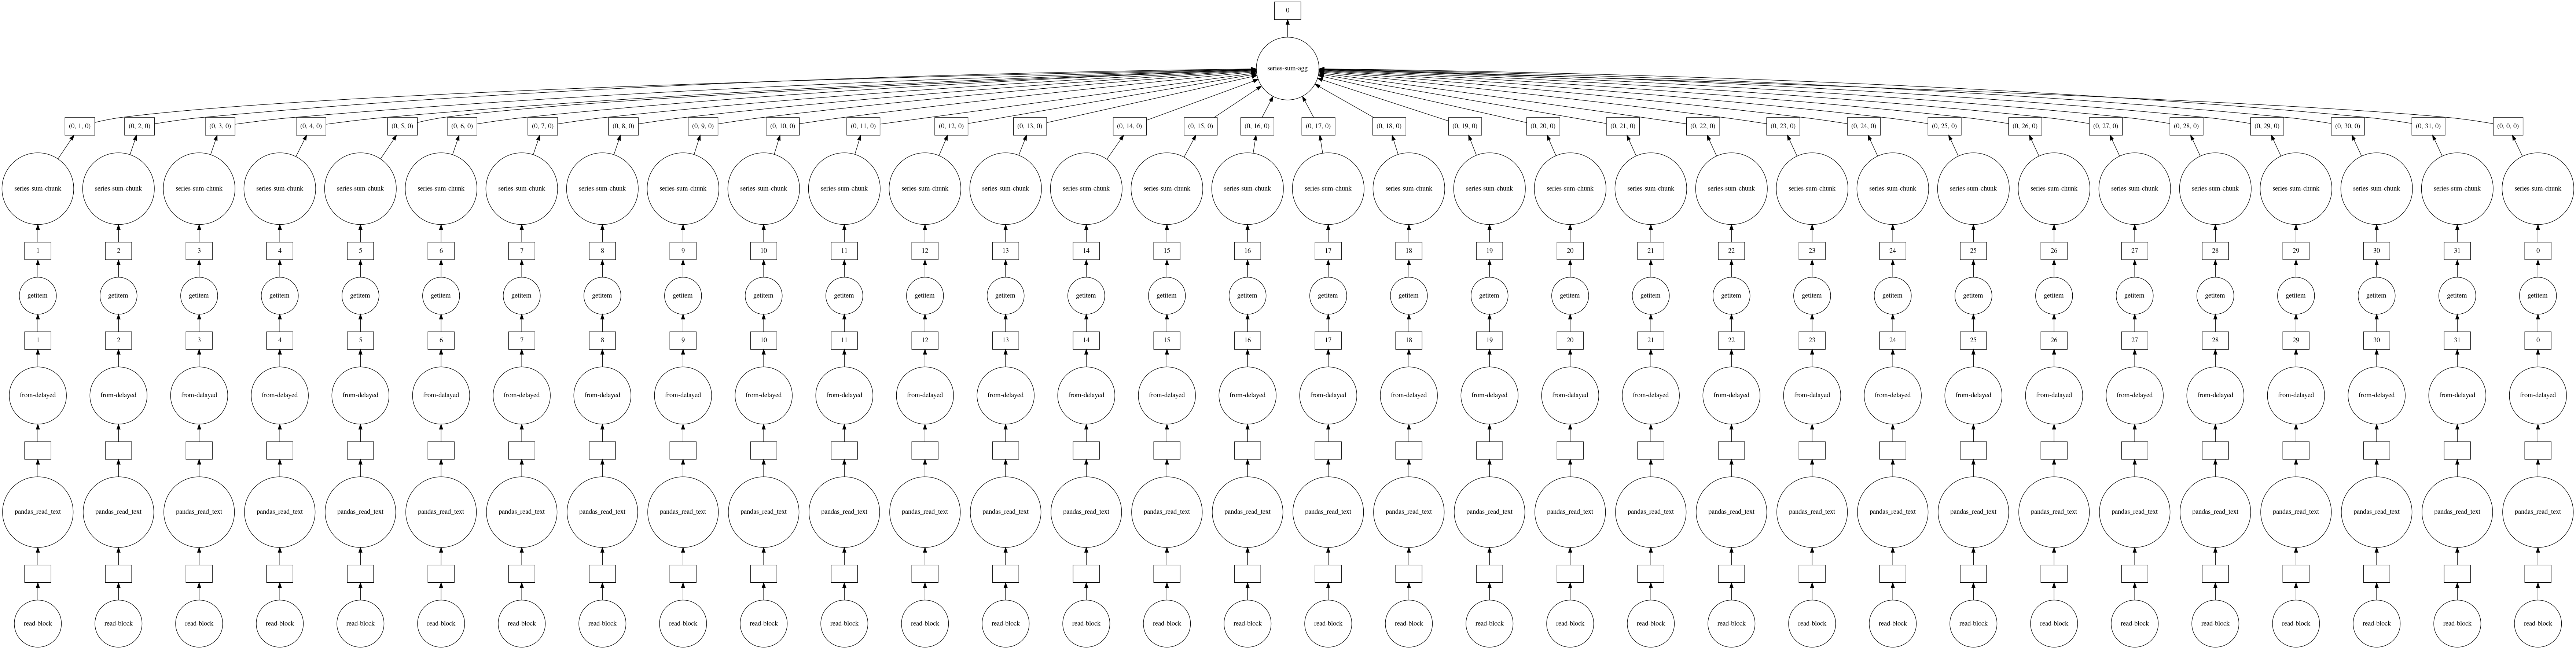

In [ ]:
#*
month_df['fare_amount'].sum().visualize()

In [ ]:
#*head
month_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


## 1.Viewing the Map to locate the outliers

In [ ]:
#looking for outliers in the lat and long which not in (40.5774, -74.15) & (40.9176,-73.7004)

outlier_locations = month_df[((month_df['pickup_longitude']<=-74.15) | (month_df['pickup_latitude']<=40.5774) |\
                             (month_df['pickup_longitude']>=-73.7004) | (month_df['pickup_latitude']>= 40.9176))]
print(outlier_locations.head())

     VendorID tpep_pickup_datetime  ... improvement_surcharge  total_amount
31          2  2015-01-15 19:05:43  ...                   0.3         60.30
61          1  2015-01-04 13:44:52  ...                   0.0         14.15
66          2  2015-01-04 13:44:52  ...                   0.3          6.30
157         1  2015-01-15 09:47:00  ...                   0.3         10.80
159         1  2015-01-15 09:47:02  ...                   0.3         43.63

[5 rows x 19 columns]


In [ ]:
print(len(outlier_locations))

247742


In [ ]:
len(month_df)

12748986

In [ ]:
#look at the map
map_osm = folium.Map(location=[40.734695, -73.990372])
map_osm

In [ ]:
##we ll look at only 100 outliers
sample_outlier = outlier_locations.head(10000)

for i,j in sample_outlier.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'], j['pickup_longitude']))).add_to(map_osm)

map_osm

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/dask/dataframe/core.py:5979: UserWarning: Insufficient elements for `head`. 10000 elements requested, only 8003 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


In [ ]:
month_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


## 2.Trip duration

In [ ]:
#checking the first date to unix time frame

print((datetime.strptime('2015-01-15 19:05:39', "%Y-%m-%d %H:%M:%S").timetuple())) # timetuple() gives all info abt year, month, etc
print(time.mktime(datetime.strptime('2015-01-15 19:05:39', "%Y-%m-%d %H:%M:%S").timetuple()))

time.struct_time(tm_year=2015, tm_mon=1, tm_mday=15, tm_hour=19, tm_min=5, tm_sec=39, tm_wday=3, tm_yday=15, tm_isdst=-1)
1421348739.0


In [ ]:
#*1.convert this into unix timestamp  --> first convert into python date format and then into unix time format
import time
from datetime import datetime

def convert_to_unix_time(x):
    return time.mktime(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timetuple())

In [ ]:
month_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].compute()

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2015-01-15 19:05:39,2015-01-15 19:23:42
1,2015-01-10 20:33:38,2015-01-10 20:53:28
2,2015-01-10 20:33:38,2015-01-10 20:43:41
3,2015-01-10 20:33:39,2015-01-10 20:35:31
4,2015-01-10 20:33:39,2015-01-10 20:52:58
...,...,...
12615,2015-01-10 19:01:44,2015-01-10 19:05:40
12616,2015-01-10 19:01:44,2015-01-10 19:07:26
12617,2015-01-10 19:01:44,2015-01-10 19:15:01
12618,2015-01-10 19:01:44,2015-01-10 19:17:03


In [ ]:
#*2. return with speed and other trip timings on new_df

def return_with_trip_times(month_df):
    
    durations = month_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].compute()
    #pickups and dropoffs to unix time
    pickup_duration = [convert_to_unix_time(x) for x in durations['tpep_pickup_datetime'].values]
    drop_duration = [convert_to_unix_time(x) for x in durations['tpep_dropoff_datetime'].values]
    
    #calculate duration of trips
    duration_of_trip = (np.array(drop_duration) - np.array(pickup_duration))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month_df[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_duration'] = duration_of_trip
    new_frame['pickup_time'] = pickup_duration
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_duration']) 
    
    return new_frame

new_df = return_with_trip_times(month_df)

In [ ]:
#*
new_df.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378


### 2.1 Boxplot of trip duration

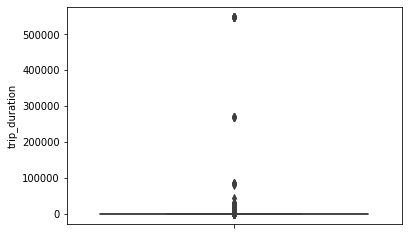

In [ ]:
#box plot of duration of the trip
sns.boxplot(y='trip_duration', data=new_df)
plt.show()

In [ ]:
#looking at the 0-100th percentile of trip duration as if it exceeds more than 12 hrs it is outliers
for i in range(0,100,10):
    val = new_df['trip_duration'].values
    val = np.sort(val, axis=None)   #sort in ascending order
    percentile = len(val)*(float(i)/100)
    print('{} percentile is {}'.format(i, val[int(percentile)]))

print('100 percentile is', val[-1])

0 percentile is -1211.0166666666667
10 percentile is 3.8333333333333335
20 percentile is 5.383333333333334
30 percentile is 6.816666666666666
40 percentile is 8.3
50 percentile is 9.95
60 percentile is 11.866666666666667
70 percentile is 14.283333333333333
80 percentile is 17.633333333333333
90 percentile is 23.45
100 percentile is 548555.6333333333


In [ ]:
#calculating b/w 90 and 99
for i in range(90,100,1):
    val = new_df['trip_duration'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile is {}'.format(i, val[int(percentile)]))

print('100 percentile is ',val[-1])

90 percentile is 23.45
91 percentile is 24.35
92 percentile is 25.383333333333333
93 percentile is 26.55
94 percentile is 27.933333333333334
95 percentile is 29.583333333333332
96 percentile is 31.683333333333334
97 percentile is 34.46666666666667
98 percentile is 38.71666666666667
99 percentile is 46.75
100 percentile is  548555.6333333333


In [ ]:
#removing the data which has duration of the trip which is more than 720mins
new_df_modified = new_df[(new_df['trip_duration']>1) & (new_df['trip_duration']<720)]

#### 2.1.1 Boxplot of trip duration after outlier removal

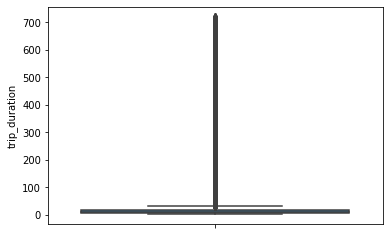

In [ ]:
#box plot after removal of outliers
sns.boxplot(y='trip_duration', data=new_df_modified)
plt.show()

In [ ]:
#looking at the percentile
for i in range(0,100,10):
    val = new_df_modified['trip_duration'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile is {}'.format(i, percentile))

print('100 percentile is ',val[-1])

0 percentile is 0.0
10 percentile is 1263524.6
20 percentile is 2527049.2
30 percentile is 3790573.8
40 percentile is 5054098.4
50 percentile is 6317623.0
60 percentile is 7581147.6
70 percentile is 8844672.2
80 percentile is 10108196.8
90 percentile is 11371721.4
100 percentile is  719.7666666666667


In [ ]:
#looking at the percentile
for i in range(90,100,1):
    val = new_df_modified['trip_duration'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile is {}'.format(i, percentile))

print('100 percentile is ',val[-1])

90 percentile is 11371721.4
91 percentile is 11498073.860000001
92 percentile is 11624426.32
93 percentile is 11750778.780000001
94 percentile is 11877131.24
95 percentile is 12003483.7
96 percentile is 12129836.16
97 percentile is 12256188.62
98 percentile is 12382541.08
99 percentile is 12508893.54
100 percentile is  719.7666666666667


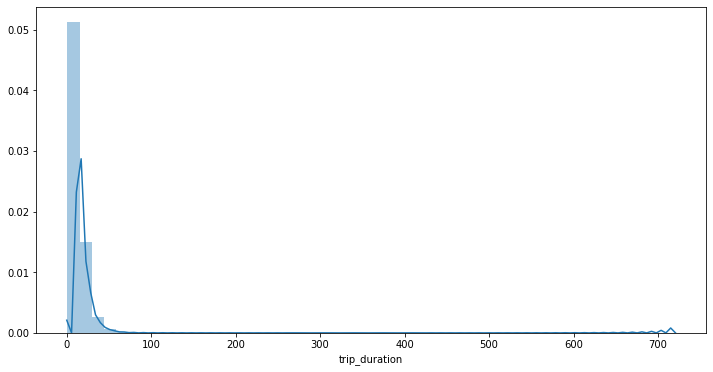

In [ ]:
#pdf of trip times after removing the outliers
plt.figure(figsize=(12,6))
sns.distplot(new_df_modified['trip_duration'])
plt.show()

In [ ]:
#converting the value into log to check the log normal
import math
new_df_modified['log_trip_duration'] = [math.log(i) for i in new_df_modified['trip_duration'].values]

new_df_modified.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed,log_trip_duration
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319,2.893146
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193,2.987364
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269,2.307573
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429,0.624154
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378,2.960968


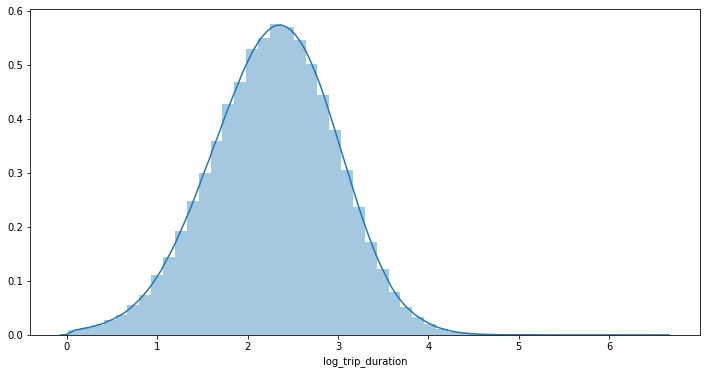

In [ ]:
#pdf plot of log of trip duration
plt.figure(figsize=(12,6))
sns.distplot(new_df_modified['log_trip_duration'])
plt.show()

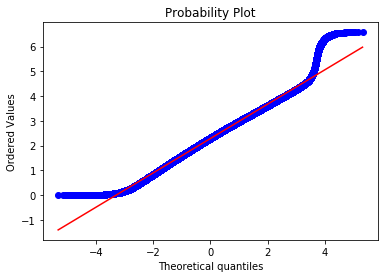

In [ ]:
#Q-Q plot to check if the data is log-normal
import scipy
scipy.stats.probplot(new_df_modified['log_trip_duration'].values, plot=plt)
plt.show()

## 3. Speed

In [ ]:
new_df_modified.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed,log_trip_duration
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319,2.893146
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193,2.987364
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269,2.307573
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429,0.624154
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378,2.960968


### 3.1 Boxplot of Speed

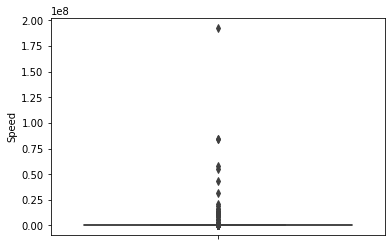

In [ ]:
sns.boxplot(y='Speed', data=new_df_modified)
plt.show()

In [ ]:
#0-100 percentile values
for i in range(0,100,10):
    val = new_df_modified['Speed'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile value is {}'.format(i, val[int(percentile)]))

print('100 percentile value is', val[-1])

0 percentile value is 0.0
10 percentile value is 6.409495548961425
20 percentile value is 7.80952380952381
30 percentile value is 8.929133858267717
40 percentile value is 9.98019801980198
50 percentile value is 11.06865671641791
60 percentile value is 12.286689419795222
70 percentile value is 13.796407185628745
80 percentile value is 15.963224893917962
90 percentile value is 20.186915887850468
100 percentile value is 192857142.85714284


In [ ]:
#90-100 percentile values
for i in range(90,100,1):
    val = new_df_modified['Speed'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile value is {}'.format(i, val[int(percentile)]))

print('100 percentile value is', val[-1])

90 percentile value is 20.186915887850468
91 percentile value is 20.91645569620253
92 percentile value is 21.752988047808763
93 percentile value is 22.721893491124263
94 percentile value is 23.844155844155843
95 percentile value is 25.182552504038775
96 percentile value is 26.80851063829787
97 percentile value is 28.84304932735426
98 percentile value is 31.591128254580514
99 percentile value is 35.7513566847558
100 percentile value is 192857142.85714284


In [ ]:
#99-100 percentile values
for i in np.arange(0.0, 1.0, 0.1):
    val = new_df_modified['Speed'].values
    val = np.sort(val, axis=None)
    percentile = (float(99+i)/100)*(len(val))
    print('{} percentile value is {}'.format(99+i, val[int(percentile)]))

print('100 percentile value is', val[-1])

99.0 percentile value is 35.7513566847558
99.1 percentile value is 36.31084727468969
99.2 percentile value is 36.91470054446461
99.3 percentile value is 37.588235294117645
99.4 percentile value is 38.33035714285714
99.5 percentile value is 39.17580340264651
99.6 percentile value is 40.15384615384615
99.7 percentile value is 41.338301043219076
99.8 percentile value is 42.86631016042781
99.9 percentile value is 45.3107822410148
100 percentile value is 192857142.85714284


In [ ]:
#removing speed more than 45.310
new_df_modified = new_df[(new_df['Speed']>1.0) & (new_df['Speed']<45.31)]
new_df_modified.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378


In [ ]:
#average speed of the cabs
print(float(sum(new_df_modified['Speed'])/len(new_df_modified)))

12.464154885271354


## 4. Trip Distance

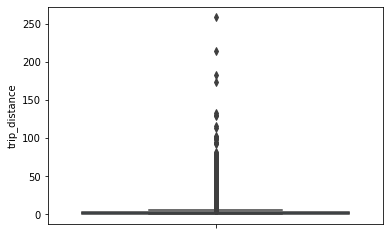

In [ ]:
#boxplot of trip distance
sns.boxplot(y='trip_distance', data=new_df_modified)
plt.show()

In [ ]:
#0-100 percentile values
for i in range(0,100,10):
    val = new_df_modified['trip_distance'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile value is {}'.format(i, val[int(percentile)]))

print('100 percentile value is', val[-1])

0 percentile value is 0.01
10 percentile value is 0.66
20 percentile value is 0.9
30 percentile value is 1.1
40 percentile value is 1.39
50 percentile value is 1.69
60 percentile value is 2.07
70 percentile value is 2.6
80 percentile value is 3.6
90 percentile value is 5.97
100 percentile value is 258.9


In [ ]:
#90-100 percentile values
for i in range(90,100,1):
    val = new_df_modified['trip_distance'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile value is {}'.format(i, val[int(percentile)]))

print('100 percentile value is', val[-1])

90 percentile value is 5.97
91 percentile value is 6.45
92 percentile value is 7.07
93 percentile value is 7.85
94 percentile value is 8.72
95 percentile value is 9.6
96 percentile value is 10.6
97 percentile value is 12.1
98 percentile value is 16.04
99 percentile value is 18.17
100 percentile value is 258.9


In [ ]:
#99-100 percentile values
for i in np.arange(0.0,1.0,0.1):
    val = new_df_modified['trip_distance'].values
    val = np.sort(val, axis=None)
    percentile = (float(99+i)/100)*(len(val))
    print('{} percentile value is {}'.format(99+i, val[int(percentile)]))

print('100 percentile value is', val[-1])

99.0 percentile value is 18.17
99.1 percentile value is 18.37
99.2 percentile value is 18.6
99.3 percentile value is 18.83
99.4 percentile value is 19.13
99.5 percentile value is 19.5
99.6 percentile value is 19.96
99.7 percentile value is 20.51
99.8 percentile value is 21.23
99.9 percentile value is 22.58
100 percentile value is 258.9


In [ ]:
new_df_modified = new_df[(new_df['trip_distance']>0) & (new_df['trip_distance']<23)]
new_df_modified.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378


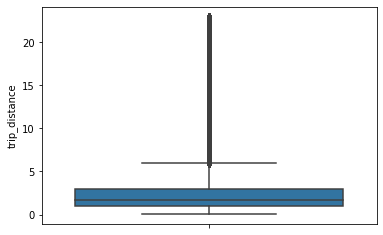

In [ ]:
#boxplot after removal of outliers in trip distance
sns.boxplot(y='trip_distance', data=new_df_modified)
plt.show()

## 5. Total Fare

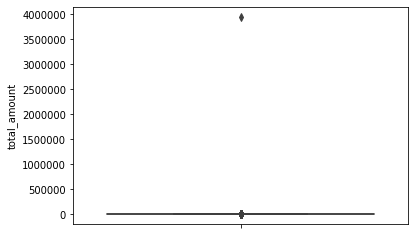

In [ ]:
#boxplot after removal of outliers in trip distance
sns.boxplot(y='total_amount', data=new_df_modified)
plt.show()

In [ ]:
#0-100 percentile values
for i in range(0,100,10):
    val = new_df_modified['total_amount'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile value is {}'.format(i, val[int(percentile)]))

print('100 percentile value is', val[-1])

0 percentile value is -242.55
10 percentile value is 6.3
20 percentile value is 7.8
30 percentile value is 8.8
40 percentile value is 9.8
50 percentile value is 11.16
60 percentile value is 12.8
70 percentile value is 14.8
80 percentile value is 18.3
90 percentile value is 25.8
100 percentile value is 3950611.6


In [ ]:
#90-100 percentile values
for i in range(90,100,1):
    val = new_df_modified['total_amount'].values
    val = np.sort(val, axis=None)
    percentile = (float(i)/100)*(len(val))
    print('{} percentile value is {}'.format(i, val[int(percentile)]))

print('100 percentile value is', val[-1])

90 percentile value is 25.8
91 percentile value is 27.3
92 percentile value is 29.3
93 percentile value is 31.8
94 percentile value is 34.8
95 percentile value is 38.53
96 percentile value is 42.6
97 percentile value is 48.13
98 percentile value is 58.13
99 percentile value is 66.13
100 percentile value is 3950611.6


In [ ]:
#99-100 percentile values
for i in np.arange(0.0,1.0,0.1):
    val = new_df_modified['total_amount'].values
    val = np.sort(val, axis=None)
    percentile = (float(99+i)/100)*(len(val))
    print('{} percentile value is {}'.format(99+i, val[int(percentile)]))

print('100 percentile value is', val[-1])

99.0 percentile value is 66.13
99.1 percentile value is 68.13
99.2 percentile value is 69.6
99.3 percentile value is 69.6
99.4 percentile value is 69.73
99.5 percentile value is 69.75
99.6 percentile value is 69.76
99.7 percentile value is 72.58
99.8 percentile value is 75.35
99.9 percentile value is 88.28
100 percentile value is 3950611.6


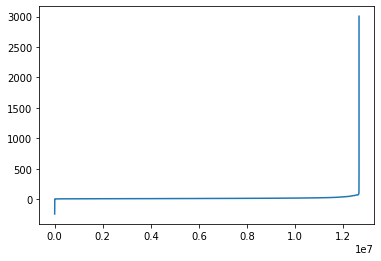

In [ ]:
#lets look at the plot without the last two fares in total amount
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
plt.plot(val[:-2])
plt.show()

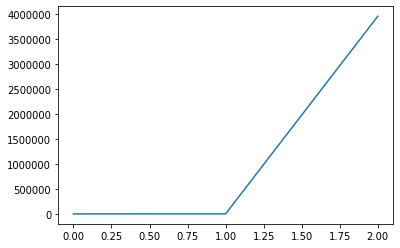

In [ ]:
# a very sharp increase in fare values can be seen 
# plotting last three total fare values, and we can observe there is share increase in the values
plt.plot(val[-3:])
plt.show()

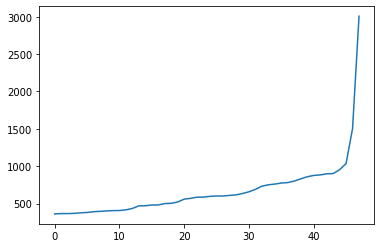

In [ ]:
#now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.plot(val[-50:-2])
plt.show()

In [ ]:
new_df_modified = new_df[(new_df['total_amount']>0) & (new_df['total_amount']<1000)]
new_df_modified.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378


In [ ]:
new_df_modified.shape[0]

12743711

In [ ]:
len(month_df)

12748986

In [ ]:
print('% of points retained after removing all outliers', (new_df_modified.shape[0]/ len(month_df)*100))

% of points retained after removing all outliers 99.9586241603842


## 6. Data Preparations

In [ ]:
#*removing all outliers based on our univariate analysis above
def remove_outliers(new_frame):

    
    a = new_frame.shape[0]
    print ("Number of pickup records = ",a)
    temp_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    temp_frame = new_frame[(new_frame.trip_duration > 0) & (new_frame.trip_duration < 720)]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    d = temp_frame.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.Speed <= 65) & (new_frame.Speed >= 0)]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    new_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    
    new_frame = new_frame[(new_frame.trip_duration > 0) & (new_frame.trip_duration < 720)]
    new_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    new_frame = new_frame[(new_frame.Speed < 45.31) & (new_frame.Speed > 0)]
    new_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("---")
    return new_frame

In [ ]:
#*
print ("Removing outliers in the month of Jan-2015")
print ("----")
new_df_outliers_removed = remove_outliers(new_df)
print("fraction of data points that remain after removing outliers", float(len(new_df_outliers_removed))/len(new_df))

Removing outliers in the month of Jan-2015
----
Number of pickup records =  12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from trip distance analysis: 92597
Number of outliers from speed analysis: 24473
Number of outliers from fare analysis: 5275
Total outliers removed 377910
---
fraction of data points that remain after removing outliers 0.9703576425607495


In [ ]:
new_df_outliers_removed.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378


In [ ]:
import pickle
f = open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/new_df_outliers_removed', 'wb') 
pickle.dump(new_df_outliers_removed ,f)

### 6.1 Finding cluster and cluster center

In [ ]:
#finding the clusters using latitude and longitude
from sklearn.cluster import MiniBatchKMeans
coords = new_df_outliers_removed[['pickup_longitude', 'pickup_latitude']]

def find_clusters(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(coords)
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len

### 6.2 finding the distance between the cluster centers

In [ ]:
!pip install gpxpy

     |████████████████████████████████| 112kB 2.8MB/s 
  Created wheel for gpxpy: filename=gpxpy-1.4.2-cp36-none-any.whl size=42546 sha256=a05d0721136d8645f3a9597654656dc20d9aa22a264c84d75b86085d1e8f8212
  Stored in directory: /root/.cache/pip/wheels/d9/df/ed/b52985999b3967fa0ef8de22b3dc8ad3494ce3380d5328dd0f
Successfully built gpxpy


In [ ]:
#trying different cluster sizes to choose the right K in K-means
from gpxpy.geo import haversine_distance
coords = new_df_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
neighbours=[]

def find_min_distance(cluster_centers, cluster_len):
    less2 = []
    more2 = []
    min_dist=1000
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if j!=i:
                distance = haversine_distance(cluster_centers[i][0], cluster_centers[i][1],cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist,distance/(1.60934*1000))
                if (distance/(1.60934*1000)) <= 2:   #if the distance b/w clusters centres is less than 2 mile then it is a nice points
                    nice_points +=1
                else:
                    wrong_points += 1
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)
    print ("On choosing a cluster size of ",cluster_len,"\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less2)/len(less2)), "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2)/len(more2)),"\nMin inter-cluster distance = ",min_dist,"\n---")
       

In [ ]:
# we need to choose number of clusters so that, there are more number of cluster regions 
#that are close to any cluster center
# and make sure that the minimum inter cluster should not be very less
for increment in range(10, 100, 10):
    cluster_centers, cluster_len = find_clusters(increment)
    find_min_distance(cluster_centers, cluster_len)     

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  1.0945442325142662 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.0 
Min inter-cluster distance =  0.7131298007388065 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 22.0 
Min inter-cluster distance =  0.5185088176172186 
---
On choosing a cluster size of  40 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 32.0 
Min inter-cluster distance 

## 6.3 Finding the cluster centers at k=40

In [ ]:
from sklearn.cluster import MiniBatchKMeans

coords = new_df_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
kmeans = MiniBatchKMeans(n_clusters=40, batch_size=10000, random_state=42).fit(coords)
new_df_outliers_removed['pickup_cluster'] = kmeans.predict(new_df_outliers_removed[['pickup_latitude', 'pickup_longitude']])

### 6.3.1 Plotting the cluster centers

In [ ]:
import folium

cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)

map_osm = folium.Map(location=[40.734695, -73.990372])
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0], cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

### 6.3.2 Plotting the clusters

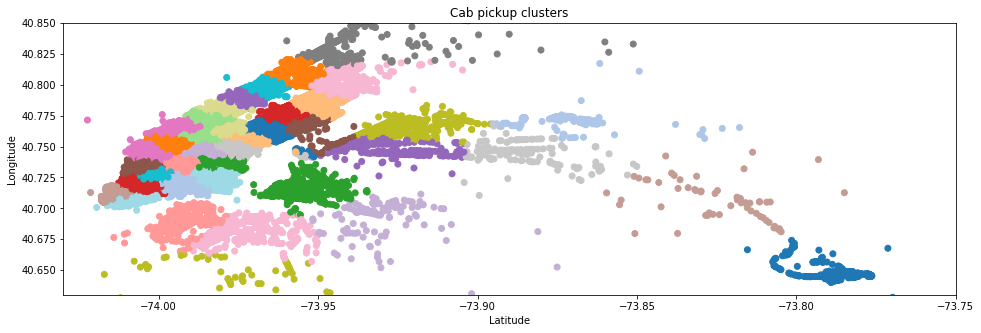

In [ ]:
x = new_df_outliers_removed['pickup_longitude'][0:100000]
y = new_df_outliers_removed['pickup_latitude'][0:100000]

color_based_on_cluster = new_df_outliers_removed['pickup_cluster'][0:100000]
city_longitude_border = (-74.03, -73.75)
city_latitude_border = (40.63, 40.85)

plt.figure(figsize=(16,5))
plt.scatter(x,y, c=color_based_on_cluster, cmap='tab20')
plt.title('Cab pickup clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.ylim(city_latitude_border)
plt.xlim(city_longitude_border)
plt.show()

## 6.4 Time Binning

In [ ]:
new_df_outliers_removed.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed,pickup_cluster
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319,4
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193,36
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269,37
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429,22
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378,0


In [ ]:
#Refer:https://www.unixtimestamp.com/
# 1420070400 : 2015-01-01 00:00:00 
# 1422748800 : 2015-02-01 00:00:00 
# 1425168000 : 2015-03-01 00:00:00
# 1427846400 : 2015-04-01 00:00:00 
# 1430438400 : 2015-05-01 00:00:00 
# 1433116800 : 2015-06-01 00:00:00

# 1451606400 : 2016-01-01 00:00:00 
# 1454284800 : 2016-02-01 00:00:00 
# 1456790400 : 2016-03-01 00:00:00
# 1459468800 : 2016-04-01 00:00:00 
# 1462060800 : 2016-05-01 00:00:00 
# 1464739200 : 2016-06-01 00:00:00

def add_pickup_bins(frame, month, year):
    unix_pickup_time = [i for i in frame['pickup_time'].values]
    unix_times_for_year_2015_16 = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800], 
                                   [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]
                                  ]
    start_pickup_unix = unix_times_for_year_2015_16[year-2015][month-1]

    # (i-start_pickup_unix) is (pickup_time - start of the day on that month in 2015 or 2016 and our unix time is in gmt to we are converting it to est using and also convert into 10 mins bins (/600)+33)
    tenminute_binned_pickup_times = [int(((i-start_pickup_unix)/600)+33) for i in unix_pickup_time]
    frame['pickup_bins'] = np.array(tenminute_binned_pickup_times)
    return frame

In [ ]:
jan_2015_frame = add_pickup_bins(new_df_outliers_removed, 1, 2015)
jan_2015_frame.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed,pickup_cluster,pickup_bins
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319,4,2163
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193,36,1452
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269,37,1452
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429,22,1452
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378,0,1452


In [ ]:
jan_2015_groupby = jan_2015_frame[['pickup_cluster', 'pickup_bins', 'trip_distance']].groupby(['pickup_cluster', 'pickup_bins']).count()
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              33                      89
               34                     190
               35                     300
               36                     289
               37                     318

## 6.5 Data Prepations for 2016- Jan, Feb, Mar

In [ ]:
def data_prep(data_csv, kmeans, year_no, month_no):
    print('Return the data frame with trip duration')
    new_df_2016 = return_with_trip_times(data_csv)
    
    print('removing the outliers')
    new_df_outliers_removed_2016 = remove_outliers(new_df_2016)
    
    print('Predicting the cluster centers')
    new_df_outliers_removed_2016['pickup_cluster'] = kmeans.predict(new_df_outliers_removed_2016[['pickup_latitude', 'pickup_longitude']])

    print('Final groupby')
    final_update_frame = add_pickup_bins(new_df_outliers_removed_2016, month_no, year_no)
    final_groupby_frame = final_update_frame[['pickup_cluster', 'pickup_bins', 'trip_distance']].groupby(['pickup_cluster', 'pickup_bins']).count()

    print('='*50)
    return final_update_frame, final_groupby_frame

# Note:
- As per the AAIC instructors in email, they told me to do only on jan_2016 data because all three months data crashes my memory

In [ ]:
month_jan_2016 = dd.read_csv('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/Copy of yellow_tripdata_2016-01.csv')
month_feb_2016 = dd.read_csv('yellow_tripdata_2016-02.csv')
month_mar_2016 = dd.read_csv('yellow_tripdata_2016-03.csv')

jan_2016_frame, jan_2016_groupby = data_prep(month_jan_2016, kmeans, 2016, 1)
feb_2016_frame, feb_2016_groupby = data_prep(month_feb_2016, kmeans, 2016, 2)
mar_2016_frame, mar_2016_groupby = data_prep(month_mar_2016, kmeans, 2016, 3)

Return the data frame with trip duration
removing the outliers
Number of pickup records =  10906858
Number of outlier coordinates lying outside NY boundaries: 214677
Number of outliers from trip times analysis: 27190
Number of outliers from trip distance analysis: 79742
Number of outliers from speed analysis: 21047
Number of outliers from fare analysis: 4991
Total outliers removed 297784
---
Predicting the cluster centers
Final groupby


## 6.6 Smoothing

In [ ]:
#Get the total number of unique bins for each cluster
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,40):
        new = frame[frame['pickup_cluster'] == i]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values

In [ ]:
#No of unique bins
jan_2015_unique_bins = return_unq_pickup_bins(jan_2015_frame)
jan_2016_unique_bins = return_unq_pickup_bins(jan_2016_frame)
feb_2016_unique_bins = return_unq_pickup_bins(feb_2016_frame)
mar_2016_unique_bins = return_unq_pickup_bins(mar_2016_frame)

In [ ]:
#the total number of 10min bins for a single month = (31days * 24hrs * 60mins/ 10min ) = 4464 bins for one month
for i in range(0,40):
    print('for the {}th cluster, number of 10min interval with zero pickup={}'.format(i, 4464-len(set(jan_2015_unique_bins[i]))))

for the 0th cluster, number of 10min interval with zero pickup=26
for the 1th cluster, number of 10min interval with zero pickup=150
for the 2th cluster, number of 10min interval with zero pickup=33
for the 3th cluster, number of 10min interval with zero pickup=426
for the 4th cluster, number of 10min interval with zero pickup=42
for the 5th cluster, number of 10min interval with zero pickup=50
for the 6th cluster, number of 10min interval with zero pickup=22
for the 7th cluster, number of 10min interval with zero pickup=32
for the 8th cluster, number of 10min interval with zero pickup=34
for the 9th cluster, number of 10min interval with zero pickup=114
for the 10th cluster, number of 10min interval with zero pickup=30
for the 11th cluster, number of 10min interval with zero pickup=37
for the 12th cluster, number of 10min interval with zero pickup=33
for the 13th cluster, number of 10min interval with zero pickup=40
for the 14th cluster, number of 10min interval with zero pickup=81
fo

In [ ]:
def fill_missing(count_values,values): # values: number of unique bins, #count_values: number pickps that are happened in each region for each 10min intravel
    smoothed_regions=[]
    ind=0
    for r in range(0,40):
        smoothed_bins=[]
        for i in range(4464): #total number of 10min bins for a single month = (31days * 24hrs * 60mins/ 10min) = 4464 bins for one month
            if i in values[r]:   #if that bin(i) is in that cluster(r) then append in smoothed_bins
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

In [ ]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add smoothed data (which is calculated based on the methods that are discussed in the above markdown cell)
# we finally return smoothed data
def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion
    ind=0
    repeat=0 
    smoothed_value=0
    for r in range(0,40):
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464):
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1
                continue
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ind]) # appends the value of the pickup bin if it exists
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [ ]:
#jan 2015 is smoothed, but jan,feb,mar-2016 is just filled
import math
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values, jan_2015_unique_bins)
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values, jan_2015_unique_bins)

In [ ]:
print("number of 10min intravels among all the clusters ",len(jan_2015_fill))

number of 10min intravels among all the clusters  178560


In [ ]:
#2016 one filled where pickups = 0 
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique_bins)
feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique_bins)
mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique_bins)

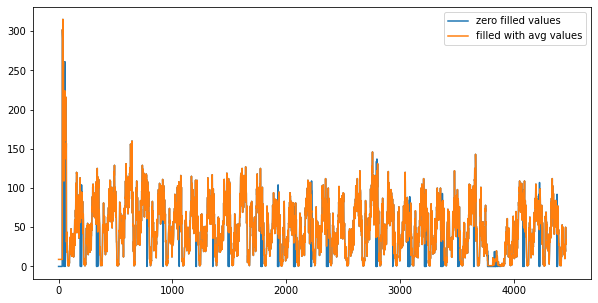

In [ ]:
# Smoothing vs Filling
# sample plot that shows two variations of filling missing values
# we have taken the number of pickups for cluster region 2
plt.figure(figsize=(10,5))
plt.plot(jan_2015_fill[4464:8920], label="zero filled values")
plt.plot(jan_2015_smooth[4464:8920], label="filled with avg values")
plt.legend()
plt.show()

## 6.7 Time Series / Fourier Series Transform

In [ ]:
# Making list of all the values of pickup data in every bin for a period of 1month (3 months) and storing them region-wise 
regions_cum = []
for i in range(0,40):
    regions_cum.append(jan_2016_smooth[4464*i:4464*(i+1)+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])

In [ ]:
import pickle
import pickle 
file = open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/regions_cum','wb')
pickle.dump(regions_cum, file)

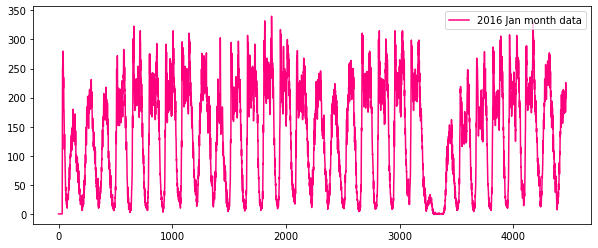

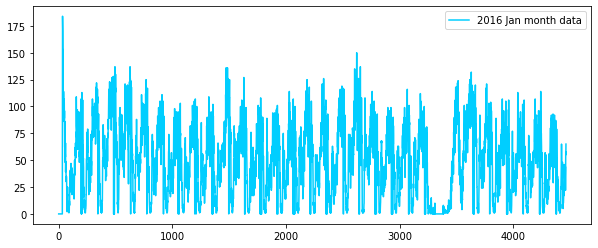

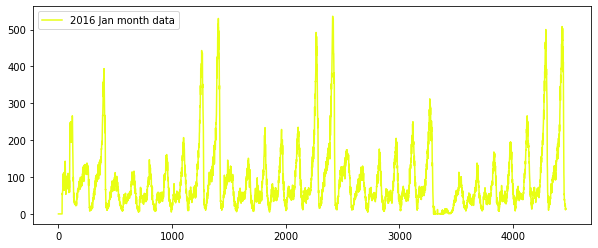

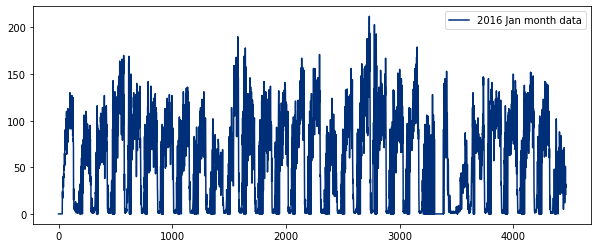

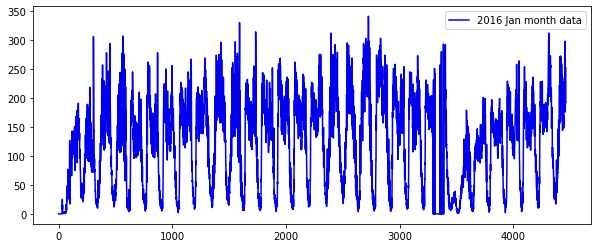

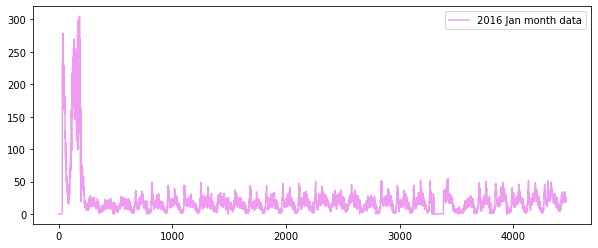

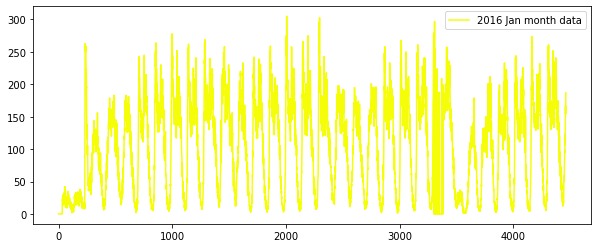

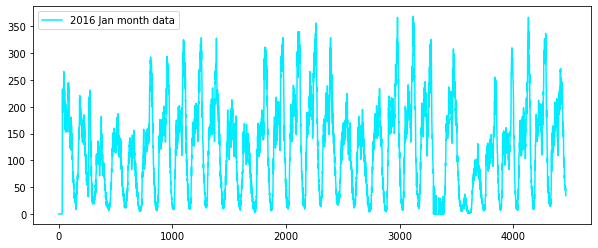

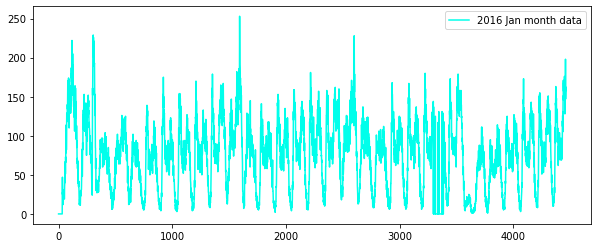

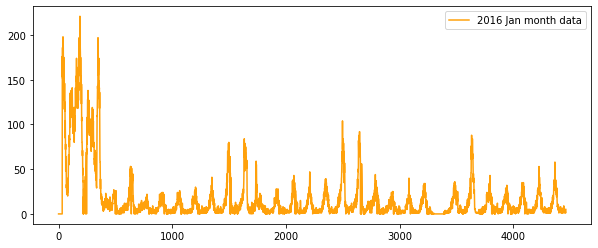

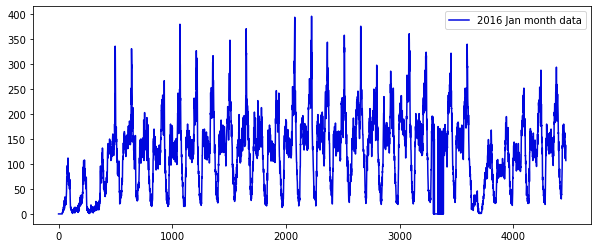

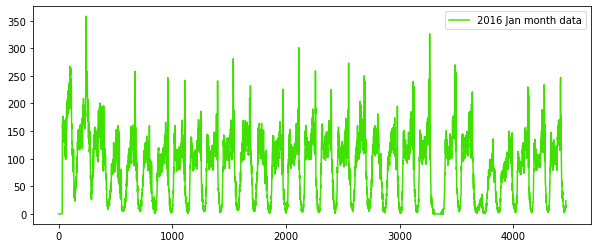

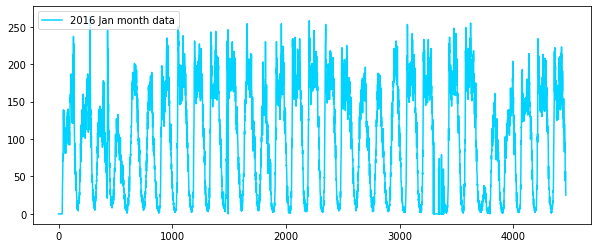

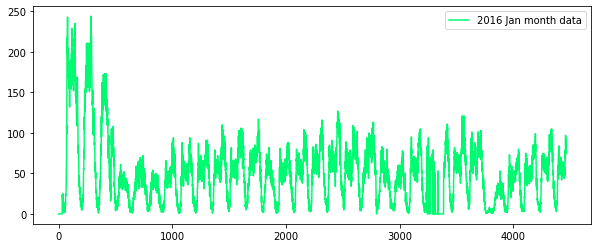

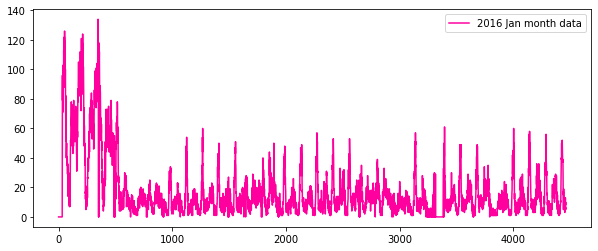

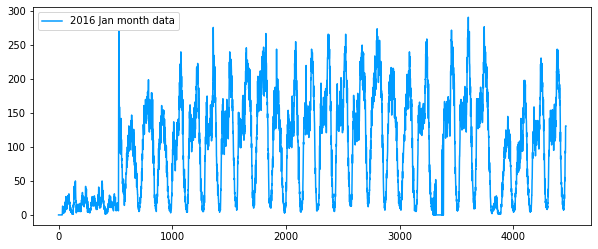

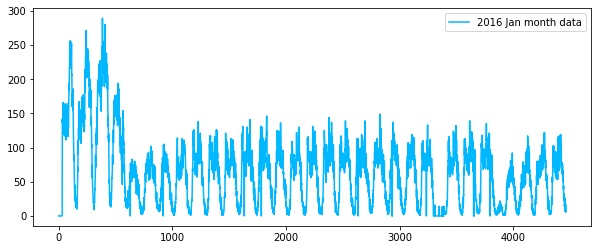

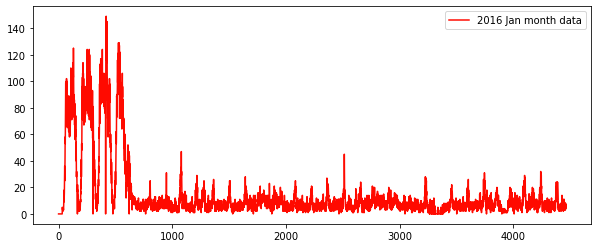

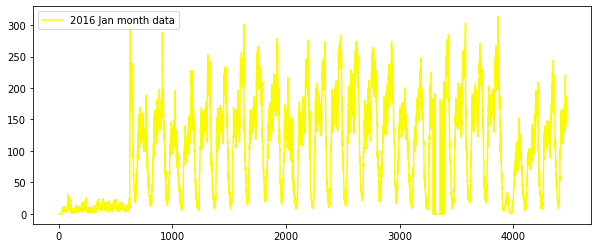

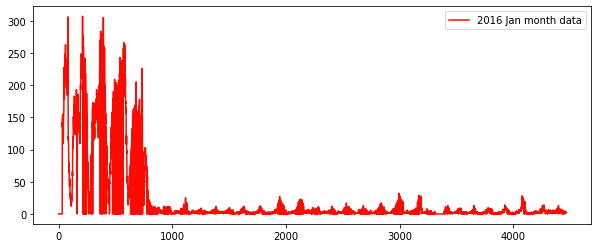

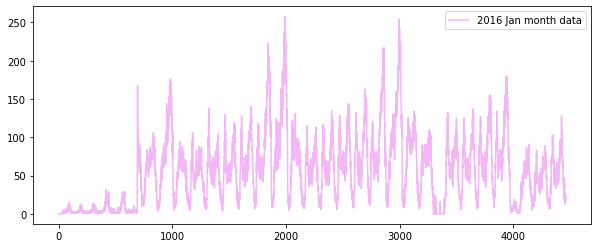

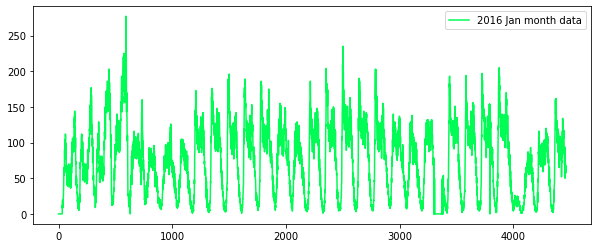

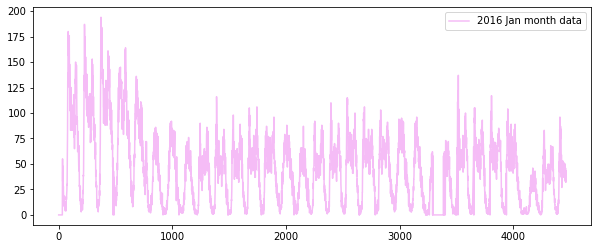

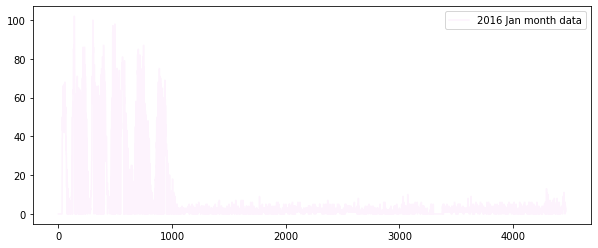

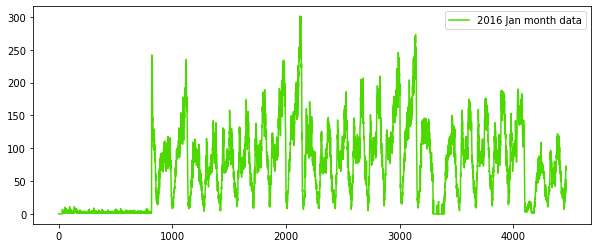

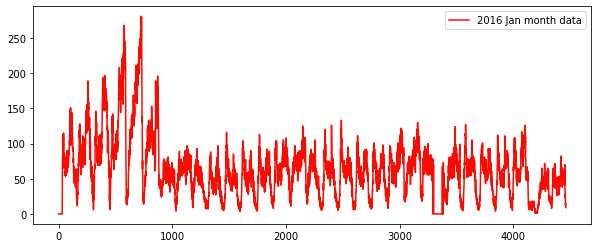

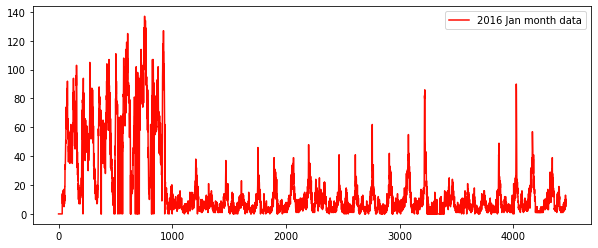

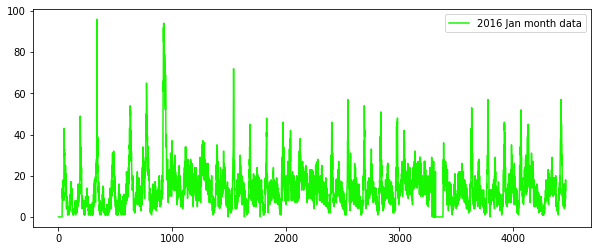

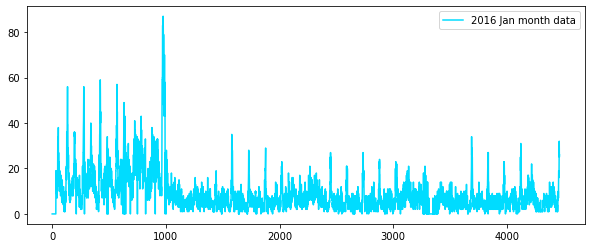

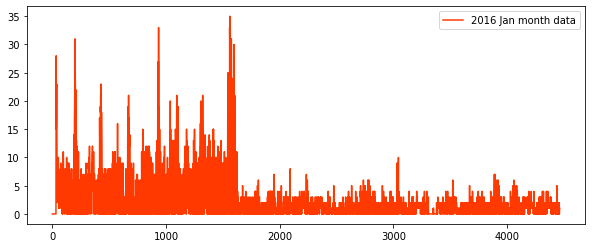

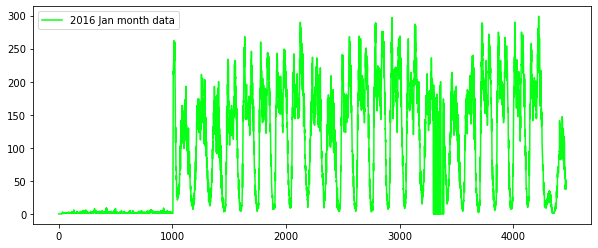

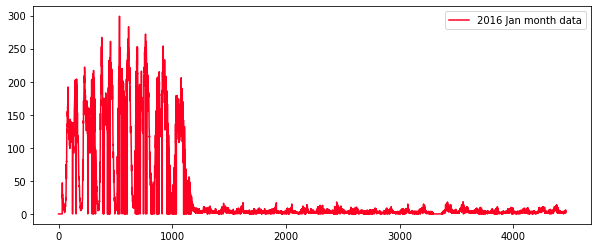

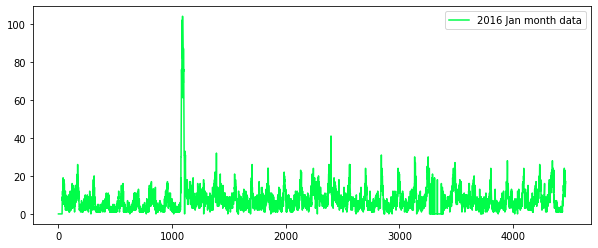

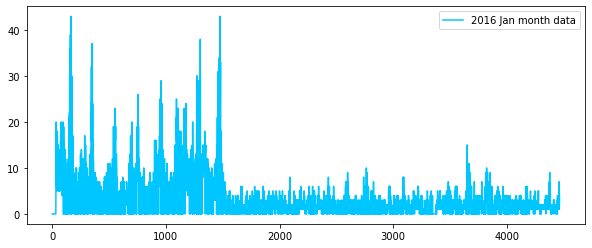

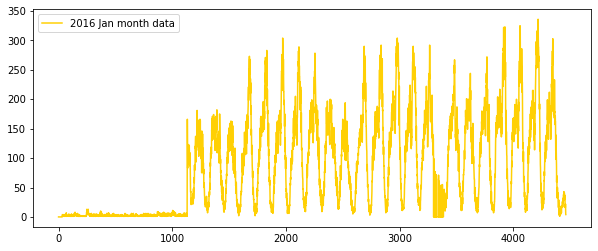

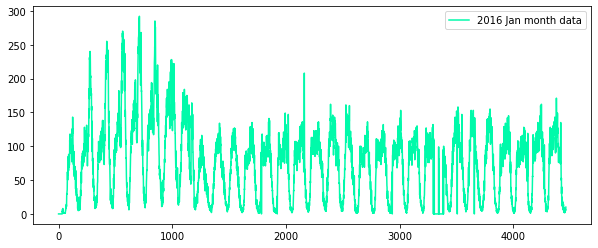

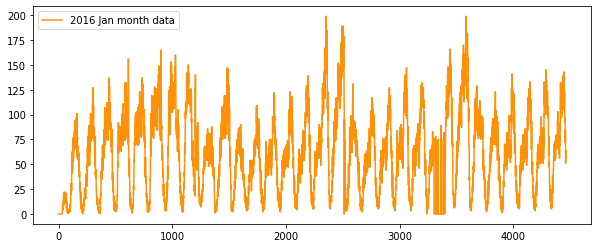

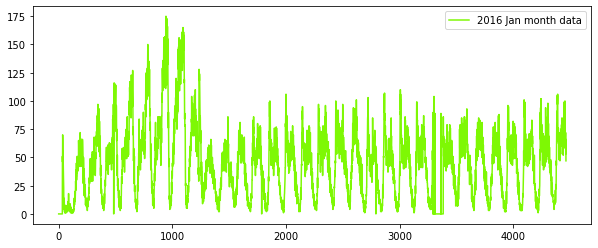

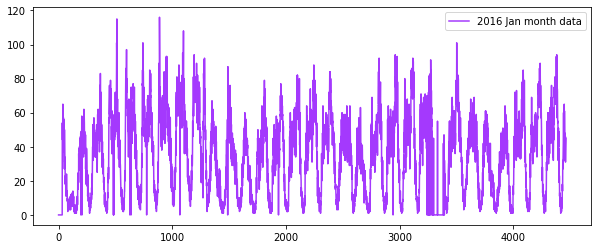

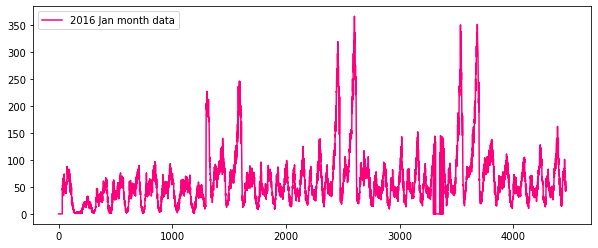

In [ ]:
def uniquesh_color():
    return plt.cm.gist_ncar(np.random.random())

first_x = list(range(0,4464))
second_x = list(range(4464, 8640))
third_x = list(range(8640, 13104))

for i in range(40):
    plt.figure(figsize=(10,4))
    plt.plot(first_x, regions_cum[i][:4464], color=uniquesh_color(), label='2016 Jan month data')
    plt.plot(second_x, regions_cum[i][4464:8640], color=uniquesh_color(), label='2016 Feb month data')
    plt.plot(third_x, regions_cum[i][8640:], color=uniquesh_color(), label='2016 Mar month data')
    plt.legend()
    plt.show()

### 6.7.1 Finding Fourier tranform and frequency

In [ ]:
Y = np.fft.fft(np.array(jan_2016_smooth)[0:4460])

freq = np.fft.fftfreq(4460, 1)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


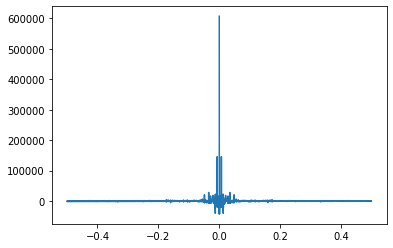

In [ ]:
plt.figure()
plt.plot(freq, Y)

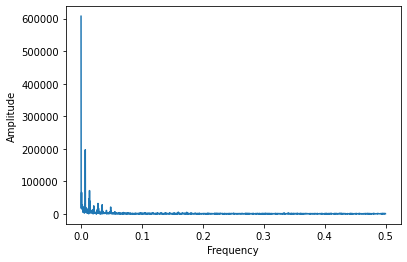

In [ ]:
n = len(freq)

plt.figure()
plt.plot(freq[:int(n/2)], np.abs(Y)[:int(n/2)])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

### 6.7.2 Preparing the data with jan-2015 as X_i and jan-2016 as y_i

In [ ]:
import pandas as pd
ratios_jan = pd.DataFrame()
ratios_jan['Given'] = jan_2015_smooth
ratios_jan['Prediction'] = jan_2016_smooth
ratios_jan['Ratio'] = (ratios_jan['Prediction']*1.0)/(ratios_jan['Given']*1.0)

In [ ]:
import pickle 
file = open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/ratios_jan','wb')
pickle.dump(ratios_jan, file)

## 7.Building Baseline Models
- feature-1 --> Ratio feature
- feature-2 --> previous known values of 2016 to predict future values

### 7.1 Methods to find out:
- Simple Moving averages of feature1
- Simple Moving averages of feature2
- Weighted Moving averages of feature1
- Weighted Moving averages of feature2
- Exponential weighted moving averages of feature1
- Exponential weighted moving averages of feature2

In [ ]:
import pickle 
with open('ratios_jan','rb') as f:
    ratios_jan = pickle.load(f)

In [ ]:
ratios_jan.head()

,Given,Prediction,Ratio
0,3,0,0.0
1,3,0,0.0
2,3,0,0.0
3,3,0,0.0
4,3,0,0.0


In [ ]:
ratios_jan.shape

(178560, 3)

#### 7.1.1 Simple Moving Average of feature 1

In [ ]:
def Moving_Avg_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratio'].values)[0]
    error=[]
    predicted_values=[]
    window_size=3
    predicted_ratio_values=[]
    
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_ratio=sum((ratios['Ratio'].values)[(i+1)-window_size:(i+1)])/window_size
        else:
            predicted_ratio=sum((ratios['Ratio'].values)[0:(i+1)])/(i+1)
            
    
    ratios['MA_R_Predicted'] = predicted_values
    ratios['MA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

#### 7.1.2 Moving average of feature2

In [ ]:
def Moving_Avg_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=1
    predicted_ratio_values=[]
    
    for i in range(0,4464*40):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_value=int(sum((ratios['Prediction'].values)[(i+1)-window_size:(i+1)])/window_size)
        else:
            predicted_value=int(sum((ratios['Prediction'].values)[0:(i+1)])/(i+1))
            
    ratios['MA_P_Predicted'] = predicted_values
    ratios['MA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

#### 7.1.3 Weighted Moving Average of feature 1

In [ ]:
def Weighted_Moving_Avg_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratio'].values)[0]
    error=[]
    predicted_values=[]
    window_size=5
    predicted_ratio_values=[]
    
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Ratio'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Ratio'].values)[j-1]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
            
    ratios['WA_R_Predicted'] = predicted_values
    ratios['WA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

#### 7.1.4 Weighted moving average of feature2

In [ ]:
def Weighted_Moving_Avg_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=2
    
    for i in range(0,4464*40):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Prediction'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)

        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Prediction'].values)[j-1]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)
    
    ratios['WA_P_Predicted'] = predicted_values
    ratios['WA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

#### 7.1.5 Exponential Weighted Moving Average 0f feature1

In [ ]:
def Exponential_Weighted_Moving_Avg_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratio'].values)[0]
    alpha=0.6
    error=[]
    predicted_values=[]
    predicted_ratio_values=[]
    
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        predicted_ratio = (alpha*predicted_ratio) + (1-alpha)*((ratios['Ratio'].values)[i])
    
    ratios['EA_R1_Predicted'] = predicted_values
    ratios['EA_R1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

#### 7.1.6 Exponential Weighted Moving Average of feature2

In [ ]:
def Exponential_Weighted_Moving_Avg_P_Predictions(ratios,month):
    predicted_value= (ratios['Prediction'].values)[0]
    alpha=0.3
    error=[]
    predicted_values=[]
    
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        predicted_value =int((alpha*predicted_value) + (1-alpha)*((ratios['Prediction'].values)[i]))
    
    ratios['EA_P1_Predicted'] = predicted_values
    ratios['EA_P1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [ ]:
import math
mean_err=[0]*6
median_err=[0]*6
ratios_jan,mean_err[0],median_err[0]=Moving_Avg_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[1],median_err[1]=Moving_Avg_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[2],median_err[2]=Weighted_Moving_Avg_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[3],median_err[3]=Weighted_Moving_Avg_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[4],median_err[4]=Exponential_Weighted_Moving_Avg_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[5],median_err[5]=Exponential_Weighted_Moving_Avg_P_Predictions(ratios_jan,'jan')

In [ ]:
print ("Error Metric Matrix (Forecasting Methods) - MAPE & MSE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Moving Averages (Ratios) -                             MAPE: ",mean_err[0],"      MSE: ",median_err[0])
print ("Moving Averages (2016 Values) -                        MAPE: ",mean_err[1],"       MSE: ",median_err[1])
print ("--------------------------------------------------------------------------------------------------------")
print ("Weighted Moving Averages (Ratios) -                    MAPE: ",mean_err[2],"      MSE: ",median_err[2])
print ("Weighted Moving Averages (2016 Values) -               MAPE: ",mean_err[3],"      MSE: ",median_err[3])
print ("--------------------------------------------------------------------------------------------------------")
print ("Exponential Moving Averages (Ratios) -              MAPE: ",mean_err[4],"      MSE: ",median_err[4])
print ("Exponential Moving Averages (2016 Values) -         MAPE: ",mean_err[5],"      MSE: ",median_err[5])

Error Metric Matrix (Forecasting Methods) - MAPE & MSE
--------------------------------------------------------------------------------------------------------
Moving Averages (Ratios) -                             MAPE:  0.21929896212375002       MSE:  1431.9283658154122
Moving Averages (2016 Values) -                        MAPE:  0.15465389750597616        MSE:  276.5121247759857
--------------------------------------------------------------------------------------------------------
Weighted Moving Averages (Ratios) -                    MAPE:  0.2180903712199798       MSE:  1176.199971998208
Weighted Moving Averages (2016 Values) -               MAPE:  0.14690217992333673       MSE:  242.94073140681004
--------------------------------------------------------------------------------------------------------
Exponential Moving Averages (Ratios) -              MAPE:  0.21844543639973418       MSE:  1126.2677363351254
Exponential Moving Averages (2016 Values) -         MAPE:  0.146444893

## 8.Splitting the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/regions_cum', 'rb') as f:
    regions_cum = pickle.load(f)

In [ ]:
print(len(regions_cum))
print(len(regions_cum[0]))

40
13104


In [ ]:
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/new_df_outliers_removed', 'rb') as f:
    new_df_outliers_removed = pickle.load(f)

In [ ]:
new_df_outliers_removed.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378


In [ ]:
from sklearn.cluster import MiniBatchKMeans

coords = new_df_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
kmeans = MiniBatchKMeans(n_clusters=40, batch_size=10000, random_state=0).fit(coords)
new_df_outliers_removed['pickup_cluster'] = kmeans.predict(new_df_outliers_removed[['pickup_latitude', 'pickup_longitude']])

In [ ]:
new_df_outliers_removed.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_duration,pickup_time,Speed,pickup_cluster
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319,34
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193,2
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269,16
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429,38
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378,22


In [ ]:
# Preparing data to be split into train and test, The below prepares data in cumulative form which will be later split into test and train
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

#### *************NOTE: here we take only 2016_jan , so only it contains 4644 bins**********

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 12960

#### ************ NOTE: here we take only 2016_jan, so len(regions_cum[0]=4464)

# we take number of pickups that are happened in last 5 10min intravels
number_of_time_stamps = 5

# output varaible
# it is list of lists
# it will contain number of pickups 13099 for each cluster
output = []


# tsne_lat will contain 13104-5=13099 times lattitude of cluster center for every cluster
# Ex: [[cent_lat 13099times],[cent_lat 13099times], [cent_lat 13099times].... 40 lists]
# it is list of lists

###### ******** NOTE: sice we take only jan_2016, then 4464-5 = 4459 *********
#then we get EX: [[cent_lat 4459times], [cent_lat 4459times], ... 40lists]
tsne_lat = []


# tsne_lon will contain 13104-5=13099 times logitude of cluster center for every cluster
# Ex: [[cent_long 13099times],[cent_long 13099times], [cent_long 13099times].... 40 lists]
# it is list of lists

###### ******** NOTE: since we take only jan_2016, then 4464-5 = 4459 *********
#then we get EX: [[cent_long 4459times], [cent_long 4459times], ... 40lists]
tsne_lon = []

# we will code each day 
# sunday = 0, monday=1, tue = 2, wed=3, thur=4, fri=5,sat=6
# for every cluster we will be adding 13099 values, each value represent to which day of the week that pickup bin belongs to
# it is list of lists


##### ********* NOTE: since we take only jan_2016, we will get 4459 for each cluster
tsne_weekday = []

# its an numbpy array, of shape (523960, 5)
# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6]
# and so on...
tsne_feature = [0]*number_of_time_stamps     #to match the dimension in axis since if we add 5 dimension the first(empty list) also should be of matching dimension of next it will append in next iteration


for i in range(0,40):
    tsne_lat.append([kmeans.cluster_centers_[i][0]]*13099)
    tsne_lon.append([kmeans.cluster_centers_[i][1]]*13099)
    # jan 1st 2016 is thursday, so we start our day from 4: "(int(k/144))%7+4"   ---> 144 is no of bins per day
    # our prediction start from 5th 10min intravel since we need to have number of pickups that are happened in last 5 pickup bins
    # regions_cum is a list of lists [[x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], .. 40 lsits]
    tsne_weekday.append([int(((int(k/144))%7+4)%7) for k in range(5,4464+4176+4464)])
    tsne_feature = np.vstack((tsne_feature, [regions_cum[i][r:r+number_of_time_stamps] for r in range(0,len(regions_cum[i])-number_of_time_stamps)]))
    output.append(regions_cum[i][5:])

tsne_feature = tsne_feature[1:]

In [ ]:
len([regions_cum[0][r: r+5] for r in range(0, len(regions_cum[0])-5)])

13099

In [ ]:
print(len(tsne_lat[0]))

4459


In [ ]:
print(len(tsne_lat))

40


In [ ]:
print(len(tsne_feature))

523960


In [ ]:
print(len(tsne_features[0]))

5


In [ ]:
print(tsne_features.shape)

(13099, 5)


In [ ]:
len(tsne_lat[0])*len(tsne_lat)

523960

In [ ]:
tsne_features.shape[0]

13099

In [ ]:
len(tsne_weekday)*len(tsne_weekday[0])

523960

In [ ]:
40*13099

523960

In [ ]:
len(output)*len(output[0])

523960

In [ ]:
len(tsne_lat[0])*len(tsne_lat) == tsne_feature.shape[0] == len(tsne_weekday)*len(tsne_weekday[0]) == 40*13099 == len(output)*len(output[0])

True

## Note:
- Since exponential weighted avg as a feature takes memory more than 100% i am dropping this as a feature as per the suggestion from aaic

In [ ]:
from tqdm import tqdm
#taking exponential weighted avg as a feature
alpha = 0.3
predicted_values = []

predicted_list = []

for r in tqdm(range(0,40)):
    for i in range(0,4464): #13104 incase if we did for 3 months
        if i == 0:
            predicted_value = regions_cum[r][0]
            predicted_values.append(0)
            continue
        
        predicted_values.append(predicted_value)
        predicted_value = int(alpha*predicted_value)+((1-alpha)*(regions_cum[r][i]))
        predicted_list.append(predicted_values[5:])


 28%|██▊       | 11/40 [00:19<01:18,  2.72s/it]

In [ ]:
print("size of train data :", int(13099*0.7))
print("size of test data :", int(13099*0.3))

size of train data : 9169
size of test data : 3929


In [ ]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features =  [tsne_feature[i*13099:(13099*i+9169)] for i in range(0,40)]
#train_features =  [tsne_feature[i*4459:(4459*i+3121)] for i in range(0,40)]
# temp = [0]*(12955 - 9068)
test_features = [tsne_feature[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]
#test_features = [tsne_feature[(4459*(i))+3121:4459*(i+1)] for i in range(0,40)]

In [ ]:
print(len(train_features))
print(len(test_features))

40
40


In [ ]:
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list
train_new_features = []
for i in range(0,40):
    train_new_features.extend(train_features[i])
test_new_features = []
for i in range(0,40):
    test_new_features.extend(test_features[i])

In [ ]:
tsne_train_flat_lat = [i[:9169] for i in tsne_lat]
tsne_train_flat_lon = [i[:9169] for i in tsne_lon]
tsne_train_flat_weekday = [i[:9169] for i in tsne_weekday]
tsne_train_flat_output = [i[:9169] for i in output]
#tsne_train_flat_exp_avg = [i[:9169] for i in predict_list]

In [ ]:
tsne_test_flat_lat = [i[9169:] for i in tsne_lat]
tsne_test_flat_lon = [i[9169:] for i in tsne_lon]
tsne_test_flat_weekday = [i[9169:] for i in tsne_weekday]
tsne_test_flat_output = [i[9169:] for i in output]
#tsne_test_flat_exp_avg = [i[9169:] for i in predict_list]

In [ ]:
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_train_lat = sum(tsne_train_flat_lat, [])    #making list of lists to list
tsne_train_lon = sum(tsne_train_flat_lon, [])
tsne_train_weekday = sum(tsne_train_flat_weekday, [])
tsne_train_output = sum(tsne_train_flat_output, [])
#tsne_train_exp_avg = sum(tsne_train_flat_exp_avg,[])

In [ ]:
tsne_test_lat = sum(tsne_test_flat_lat, [])
tsne_test_lon = sum(tsne_test_flat_lon, [])
tsne_test_weekday = sum(tsne_test_flat_weekday, [])
tsne_test_output = sum(tsne_test_flat_output, [])
#tsne_test_exp_avg = sum(tsne_test_flat_exp_avg,[])

## 9.Preparing training and test dataframe

In [ ]:
# Preparing the data frame for our train data
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 
df_train['lat'] = tsne_train_lat
df_train['lon'] = tsne_train_lon
df_train['weekday'] = tsne_train_weekday
#df_train['exp_avg'] = tsne_train_exp_avg
print(df_train.shape)

(366760, 8)


In [ ]:
# Preparing the data frame for our train data
df_test = pd.DataFrame(data=test_new_features, columns=columns) 
df_test['lat'] = tsne_test_lat
df_test['lon'] = tsne_test_lon
df_test['weekday'] = tsne_test_weekday
#df_test['exp_avg'] = tsne_test_exp_avg
print(df_test.shape)

(157200, 8)


In [ ]:
df_train.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday
0,0,0,0,0,0,40.776228,-73.982119,4
1,0,0,0,0,0,40.776228,-73.982119,4
2,0,0,0,0,0,40.776228,-73.982119,4
3,0,0,0,0,0,40.776228,-73.982119,4
4,0,0,0,0,0,40.776228,-73.982119,4


In [ ]:
import pickle
f = open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/df_train', 'wb')
pickle.dump(df_train, f)

f = open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/df_test', 'wb')
pickle.dump(df_test, f)

### 9.1 Model - Linear Regression 

In [ ]:
from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression().fit(df_train, tsne_train_output)

y_pred = lr_reg.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]

y_pred = lr_reg.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]

### 9.2 Model-2 Random Forest Regressor

In [ ]:
#max_features = 'sqrt' means sqrt(num_of_features)
#min_sample_leaf = min number of samples required to be at leaf node. If 1 it will lead to overfit
#min_sample_split = min number of samples required to split an internal node
#n_estimators = number of base models
from sklearn.ensemble import RandomForestRegressor
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(df_train, tsne_train_output)

y_pred = regr1.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]

In [ ]:
#feature importances based on analysis using random forest
print (df_train.columns)
print (regr1.feature_importances_)

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday'], dtype='object')
[0.12476611 0.14502281 0.18207166 0.25312216 0.28382242 0.00373558
 0.0055731  0.00188616]


### 9.3 Model-3 : XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

#learning_rate = Boosting learning rate (eta)
#n_estimators = base models
#max_depth = depth of the tree
#min_child_weight = min sum of instance weight needed in a child
#gamma = min loss reduction required to make a further partition on a leaf node of a tree
#subsample = subsample ratio of training instance
#reg_alpha = l1 regularisation
#reg_lambda = l2 regularisation
#colsample_bytree = subsample ratio of columns when constructing each ratio


# the models x_model is already hyper parameter tuned
# the parameters that we got here are found using grid search

xgb_reg = XGBRegressor(learning_rate =0.1,
                        n_estimators=1000,
                        max_depth=3,
                        min_child_weight=3,
                        gamma=0,
                        subsample=0.8,
                        reg_alpha=200, reg_lambda=200,
                        colsample_bytree=0.8,nthread=4
                       )
xgb_reg.fit(df_train, tsne_train_output)

#predicting with our trained Xg-Boost regressor
y_pred = xgb_reg.predict(df_test)
xgb_test_predictions = [round(value) for value in y_pred]
y_pred = xgb_reg.predict(df_train)
xgb_train_predictions = [round(value) for value in y_pred]

In [ ]:
#featuree importances
xgb_reg.feature_importances_

array([0.00110286, 0.00339882, 0.12402125, 0.26213905, 0.6065542 ,
       0.0009222 , 0.00089048, 0.00097106], dtype=float32)

### 9.4 Error Metric for each models

In [ ]:
#mean absolute error ==> |x - x_bar|
#mape - mean absolute percentage error ==> avg((x - x_bar)/(x))
from sklearn.metrics import mean_absolute_error
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(tsne_train_output,df_train['ft_1'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
#train_mape.append((mean_absolute_error(tsne_train_output,df_train['exp_avg'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))

test_mape.append((mean_absolute_error(tsne_test_output, df_test['ft_1'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
#test_mape.append((mean_absolute_error(tsne_test_output, df_test['exp_avg'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

#### 9.4.1 Error Matrix

In [ ]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
#print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("Random Forest Regression -                   Train: ",train_mape[1],"     Test: ",test_mape[1])
print ("XgBoost Regression -                         Train: ",train_mape[2],"      Test: ",test_mape[2])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.14699836248903464       Test:  0.14109862345124485
Linear Regression -                         Train:  0.14048058883876768       Test:  0.13387658011898484
Random Forest Regression -                   Train:  0.10146424060597524      Test:  0.13123565105026994
XgBoost Regression -                         Train:  0.1368143243062736       Test:  0.13156478112422393
--------------------------------------------------------------------------------------------------------


# 10.Task-1:
- Incorporating the fourier features in our system

### 10.1Taking the features
- The output of the FFT is a complex vector containing information about the frequency content of the signal. The magnitude tells you the strength of the frequency components relative to other components.

- In a nutshell, We have the signal and we want the frequency and we use fft to get the frequency of it

In [2]:
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/df_train', 'rb') as f:
    df_train = pickle.load(f)

In [3]:
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/df_test', 'rb') as f:
    df_test = pickle.load(f)

In [7]:
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/regions_cum', 'rb') as f:
    regions_cum = pickle.load(f)

In [8]:
print(df_train.shape)
print(df_test.shape)

(366760, 8)
(157200, 8)


In [9]:
#https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html
from numpy.fft import fft, fftfreq

amplitude = []
frequency = []
for i in range(40): #40 clusters
    x_fft = fft(np.array(regions_cum[i][0:4460]))
    x_freq = fftfreq(4460,1)   #getting the frequency of above applied points
    indices = np.argsort(-x_fft[1:])  #here we dont need 0th index bcoz it is a DC component. And sorting the index in decreasing order ==> [DC, 1st_high_freq, 2nd_high_freq, ...]
    amp = []
    freq = []
    for j in range(0,9,2):    # we dont need all the amplitude values and frequency values as only 3-4 freq values are there in the graph previously
        amp.append(np.abs(x_fft[indices][j]))
        freq.append(np.abs(x_freq[indices][j]))

    for k in range(0,13099):  # for all the points 
        amplitude.append(amp)
        frequency.append(freq)

In [10]:
print(len(amplitude))
print(len(frequency))

523960
523960


In [ ]:
13099*0.7

9169.3

In [ ]:
print('The number of training points in 40 clusters is :',9169*40)
print('The number of testing points in 40 clusters is:', (13099-9169)*40)

The number of training points in 40 clusters is : 366760
The number of testing points in 40 clusters is: 157200


In [11]:
train_fft_amp = amplitude[:366760]
train_fft_freq = frequency[:366760]

test_fft_amp = amplitude[366760:]
test_fft_freq = frequency[366760:]

In [12]:
print(len(train_fft_freq))
print(len(train_fft_amp))
print(len(test_fft_freq))
print(len(test_fft_amp))

366760
366760
157200
157200


In [13]:
df_train.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday
0,0,0,0,0,0,40.776228,-73.982119,4
1,0,0,0,0,0,40.776228,-73.982119,4
2,0,0,0,0,0,40.776228,-73.982119,4
3,0,0,0,0,0,40.776228,-73.982119,4
4,0,0,0,0,0,40.776228,-73.982119,4


In [14]:
print(len(train_fft_freq[0]))
print(len(train_fft_amp[0]))
print(len(test_fft_freq[0]))
print(len(test_fft_amp[0]))

5
5
5
5


In [15]:
train_fft = np.hstack((train_fft_freq, train_fft_amp))
test_fft = np.hstack((test_fft_freq, test_fft_amp))

In [16]:
print(train_fft.shape)
print(test_fft.shape)

(366760, 10)
(157200, 10)


### 10.2 Getting the final training and test set
- including fft features with other features

In [ ]:
fourier_feat = ['freq_1','freq_2','freq_3','freq_4','freq_5','amp_1','amp_2','amp_3','amp_4','amp_5']
train_fourier = pd.DataFrame(train_fft, columns = fourier_feat)
test_fourier = pd.DataFrame(test_fft, columns = fourier_feat)
train_final = pd.concat([df_train, train_fourier], axis = 1)
test_final = pd.concat([df_test, test_fourier], axis = 1)

train_final.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,freq_1,freq_2,freq_3,freq_4,freq_5,amp_1,amp_2,amp_3,amp_4,amp_5
0,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038
1,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038
2,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038
3,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038
4,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038


In [ ]:
test_final.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,freq_1,freq_2,freq_3,freq_4,freq_5,amp_1,amp_2,amp_3,amp_4,amp_5
0,214,212,174,203,209,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229
1,212,174,203,209,201,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229
2,174,203,209,201,238,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229
3,203,209,201,238,235,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229
4,209,201,238,235,212,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229


In [ ]:
test_final.shape

(157200, 18)

# 12. New time series features
- we can take percentage of pickups in that month in a particular bin, let's say in the first 10min bin if the pickup is 40 , then the percentage of pickup in that bin 40/(addition of all pickups in that month), similarly for the second month and the third month

In [17]:
len(regions_cum[0])

13104

In [ ]:
perc_all = []
for i in range(40):
    perc_jan = []
    perc_feb = []
    perc_mar = []
    jan_cum = regions_cum[i][5:4464]        # we don't need the first 5 bins like the previous
    feb_cum = regions_cum[i][4464:8640]
    mar_cum = regions_cum[i][8640:]

    for j in jan_cum:
        perc_jan.append(i/sum(jan_cum))            #len(perc_jan) = 4459

    for k in feb_cum:
        perc_feb.append(k/sum(feb_cum))         #len(perc_feb) = 4176
    
    for l in mar_cum:
        perc_mar.append(l/sum(mar_cum))         #len(perc_mar) = 4464, 
    
    perc_all.extend(perc_jan + perc_feb + perc_mar)  #len(perc_all) = 4459+4176+4464 = 13099*40clusters , a = [3,4] ,b = [4,5] --> a+b = [3,4,4,5]
print(len(perc_all))

523960


In [ ]:
print('70% training data of 40 clusters of 13099 points:', 13099*40*0.7)
print('30% training data of 40 clusters of 13099 points:', 13099*40*0.3)

70% training data of 40 clusters of 13099 points: 366772.0
30% training data of 40 clusters of 13099 points: 157188.0


In [ ]:
train_perc = perc_all[:366760]
test_perc = perc_all[366760:]

print(len(train_perc))
print(len(test_perc))

366760
157200


In [ ]:
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/train_perc', 'wb') as f:
    pickle.dump(train_perc, f)

In [ ]:
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/test_perc', 'wb') as f:
    pickle.dump(test_perc, f)

In [ ]:
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/train_perc', 'rb') as f:
    train_perc = pickle.load(f)

In [ ]:
import pickle
with open('/content/drive/My Drive/Applied AI/Assignment/Assign-18 Taxi Demand Prediction/test_perc', 'rb') as f:
    test_perc = pickle.load(f)

### 12.1 Making the final train and test dataset

In [ ]:
train_final['pickup_percentage'] = train_perc
test_final['pickup_percentage'] = test_perc

In [2]:
train_final.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,freq_1,freq_2,freq_3,freq_4,freq_5,amp_1,amp_2,amp_3,amp_4,amp_5,pickup_percentage
0,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0
1,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0
2,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0
3,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0
4,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0


In [4]:
test_final.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,freq_1,freq_2,freq_3,freq_4,freq_5,amp_1,amp_2,amp_3,amp_4,amp_5,pickup_percentage
0,214,212,174,203,209,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229,0.000300
1,212,174,203,209,201,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229,0.000300
2,174,203,209,201,238,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229,0.000325
3,203,209,201,238,235,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229,0.000237
4,209,201,238,235,212,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229,0.000187


In [5]:
print(train_final.shape)
print(test_final.shape)

(366760, 19)
(157200, 19)


# 11. Task -2:

- Hyperparameter tuning of models

In [1]:
import pickle
with open('train_final', 'rb') as f:
    train_final = pickle.load(f)

In [3]:
import pickle
with open('test_final', 'rb') as f:
    test_final = pickle.load(f)

In [7]:
import pickle
with open('tsne_train_output', 'rb') as f:
    tsne_train_output = pickle.load(f)

In [6]:
import pickle
with open('tsne_test_output', 'rb') as f:
    tsne_test_output = pickle.load(f)

### 11.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr_reg = LinearRegression()
lr_reg.fit(train_final, tsne_train_output)

parameters_lr = {
              'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False]
}
grid_search_lr = GridSearchCV(estimator=lr_reg, param_grid=parameters_lr, cv=2, n_jobs=-1)

In [ ]:
grid_search_lr = grid_search_lr.fit(train_final, tsne_train_output)

In [ ]:
grid_search_lr.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [ ]:
len(test_final[test_final.isnull().any(1)])

40

In [8]:
#best model
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression(copy_X=True, fit_intercept=False, normalize=True)
lr_reg.fit(train_final, tsne_train_output)

y_pred = lr_reg.predict(test_final)
assign_lr_test_predictions = [round(value) for value in y_pred]

y_pred = lr_reg.predict(train_final)
assign_lr_train_predictions = [round(value) for value in y_pred]

In [11]:
#mean absolute error ==> |x - x_bar|
#mape - mean absolute percentage error ==> avg((x - x_bar)/(x))
from sklearn.metrics import mean_absolute_error
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(tsne_train_output, assign_lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
test_mape.append((mean_absolute_error(tsne_test_output, assign_lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

In [15]:
print(train_mape)
print(test_mape)

[0.14050620725152094]
[0.13398141132648447]


### 11.2 Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

reg_RF = RandomForestRegressor()
reg_RF.fit(train_final, tsne_train_output)

In [16]:
from sklearn.model_selection import RandomizedSearchCV
parameters_RF = {
                  'n_estimators' : [200,500,1000],
                 'max_depth' : [4,5,6],
                 'min_samples_split' : [3,4,5],
                 'min_samples_leaf' : [3,4,5]
                }
random_search_RF = RandomizedSearchCV(estimator=reg_RF, cv=2, param_distributions=parameters_RF, n_jobs=-1)

In [ ]:
random_search_RF = random_search_RF.fit(train_final, tsne_train_output)

In [18]:
random_search_RF.best_params_

{'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4}


In [19]:
rf_reg = RandomForestRegressor(n_estimators=1000 , max_depth=5, min_samples_split=3 , min_samples_leaf=4)
rf_reg.fit(train_final, tsne_train_output)

y_pred = rf_reg.predict(test_final)
assign_rf_test_predictions = [round(value) for value in y_pred]

y_pred = rf_reg.predict(train_final)
assign_rf_train_predictions = [round(value) for value in y_pred]

In [20]:
train_mape.append((mean_absolute_error(tsne_train_output, assign_rf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
test_mape.append((mean_absolute_error(tsne_test_output, assign_rf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

In [21]:
print(train_mape)
print(test_mape)

[0.14050620725152094, 0.14720668063484404]
[0.13398141132648447, 0.139056458305692]


### 11.3 XGBoost

In [ ]:
from xgboost import XGBRegressor
reg_XGB = XGBRegressor()
reg_XGB.fit(train_final, tsne_train_output)

parameters_XGB = {
                  'n_estimators' : [100,500,1000],
                  'learning_rate' : [0.1, 0.3, 0.5],
                  'max_depth' : [4,5,6],
                  'min_child_weight' : [3,4,5]
}
random_search_XGB = RandomizedSearchCV(estimator=reg_XGB, cv = 2, param_distribution=parameters_XGB, n_jobs=-1)

In [ ]:
random_search_XGB = random_search_XGB.fit(train_final, tsne_train_output)

In [22]:
random_search_XGB.best_params_

{'n_estimators': 500, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 4}


In [27]:

xgb_reg = XGBRegressor(n_estimators=500 , max_depth=6, min_child_weight=4, learning_rate=0.3)
xgb_reg.fit(train_final, tsne_train_output)

y_pred = xgb_reg.predict(test_final)
assign_xgb_test_predictions = [round(value) for value in y_pred]

y_pred = xgb_reg.predict(train_final)
assign_xgb_train_predictions = [round(value) for value in y_pred]

In [31]:
train_mape.append((mean_absolute_error(tsne_train_output, assign_xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
test_mape.append((mean_absolute_error(tsne_test_output, assign_xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

In [35]:
print(train_mape)
print(test_mape)

[0.14050620725152094, 0.14720668063484404, 0.11587374383259186]
[0.13398141132648447, 0.139056458305692, 0.120203458305692]


# Summary:

In [36]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Linear Regression -                         Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Random Forest Regression -                   Train: ",train_mape[1],"     Test: ",test_mape[1])
print ("XgBoost Regression -                         Train: ",train_mape[2],"      Test: ",test_mape[2])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Linear Regression -                         Train:  0.14050620725152094       Test:  0.13398141132648447
Random Forest Regression -                   Train:  0.14720668063484404      Test:  0.139056458305692
XgBoost Regression -                         Train:  0.11587374383259186       Test:  0.120203458305692
--------------------------------------------------------------------------------------------------------


# Note:
- Since the feature we come up with doesn't reduce test_mape <12. We are creating a new feature called Double and Triple Exponential Smoothing

- Double Exponential smoothing takes leven and trend into consideration.

- Triple Exponential smoothing takes level, trend and seasonality into consideration
- Refer :https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/ and https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc435.htm

## 12. Triple Exponential Smoothing

In [2]:
import pickle
with open('regions_cum', 'rb') as f:
    regions_cum = pickle.load(f)

In [3]:
import pickle
with open('train_final', 'rb') as f:
    train_final = pickle.load(f)

import pickle
with open('test_final', 'rb') as f:
    test_final = pickle.load(f)

import pickle
with open('tsne_train_output', 'rb') as f:
    tsne_train_output = pickle.load(f)

import pickle
with open('tsne_test_output', 'rb') as f:
    tsne_test_output = pickle.load(f)

In [4]:
train_final.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,freq_1,freq_2,freq_3,freq_4,freq_5,amp_1,amp_2,amp_3,amp_4,amp_5,pickup_percentage
0,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0
1,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0
2,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0
3,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0
4,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,0.0


### Note:
- Since our last feature doesn't work well , we can drop that feature

In [5]:
train_final.drop(labels='pickup_percentage', axis=1, inplace=True)
train_final.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,freq_1,freq_2,freq_3,freq_4,freq_5,amp_1,amp_2,amp_3,amp_4,amp_5
0,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038
1,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038
2,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038
3,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038
4,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038


In [6]:
test_final.drop(labels='pickup_percentage', axis=1, inplace=True)
test_final.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,freq_1,freq_2,freq_3,freq_4,freq_5,amp_1,amp_2,amp_3,amp_4,amp_5
0,214,212,174,203,209,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229
1,212,174,203,209,201,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229
2,174,203,209,201,238,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229
3,203,209,201,238,235,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229
4,209,201,238,235,212,40.776228,-73.982119,4,0.006054,0.020628,0.006278,0.002915,0.020404,2898.161701,3222.440514,4846.013743,2752.68115,4371.423229


### 12.1 Finding triple exponential smoothing
-Refer :https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/ and https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc435.htm

In [7]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

#series = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
#          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
#          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
#          18,8,17,21,31,34,44,38,31,30,26,32]

# >>> initial_trend(series, 12)
# -0.7847222222222222


def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

# >>> initial_seasonal_components(series, 12)
# {0: -7.4305555555555545, 1: -15.097222222222221, 2: -7.263888888888888, 3: -5.097222222222222, 4: 3.402777777777778, 5: 8.069444444444445, 6: 16.569444444444446, 7: 9.736111111111112, 8: -0.7638888888888887, 9: 1.902777777777778, 10: -3.263888888888889, 11: -0.7638888888888887}


def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result


# # forecast 24 points (i.e. two seasons)
# >>> triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24)
# [30, 20.34449316666667, 28.410051892109554, 30.438122252647577, 39.466817731253066, ...

### Note:
- Alpha --> smoothing factor for level
- Beta --> smoothing factor for trend
- Gamma --> smoothing factor for seasonality.

We need to find best values to get the best mape for our model

In [10]:
alpha_list = [0.1, 0.3, 0.5, 0.7, 0.9]
beta_list = [0.1, 0.3, 0.5, 0.7, 0.9]  
gamma_list = [0.1, 0.3, 0.5, 0.7, 0.9] 
length_of_season = 24

### 12.2 Finding the best value for alpha using xgboost as a classifier
- Note: In triple exponential smoothing if we take length of the season is high, the more we get the sesonality of data. So, the length_of_season = 24

In [12]:
len(triple_exponential_smoothing(regions_cum[0][0:13104], length_of_season, 0.1, 0.1, 0.1, 0))

13104

In [13]:
len(triple_exponential_smoothing(regions_cum[0][0:13104], length_of_season, 0.1, 0.1, 0.1, 0)[5:])

13099

In [14]:
len(triple_exponential_smoothing(regions_cum[0][0:13104], length_of_season, 0.1, 0.1, 0.1, 0)[5:9174])

9169

In [23]:
#taking any value for beta and gamma 
from xgboost import XGBRegressor
from tqdm import tqdm 
from sklearn.metrics import mean_absolute_error

beta = 0.5
gamma = 0.5

for alpha in alpha_list:
    predicted_values = []
    predict_list = []  #we don't need first 5 bins
    tsne_train_flat_triple_avg = []
    for i in tqdm(range(0,40)): #for 40 clusters
        predicted_values.append(triple_exponential_smoothing(regions_cum[i][0:13104], length_of_season, alpha, beta, gamma, 0))
        predict_list.append(predicted_values[i][5:])
        
    tsne_train_flat_triple_avg = [i[:9169] for i in predict_list]
    tsne_test_flat_triple_avg = [i[9169:] for i in predict_list]

    tsne_train_triple_avg = sum(tsne_train_flat_triple_avg, []) #making it as flat
    tsne_test_triple_avg = sum(tsne_test_flat_triple_avg, [])
    
    train_final['triple_exp_smoothing'] = tsne_train_triple_avg
    test_final['triple_exp_smoothing'] = tsne_test_triple_avg
    
    #fit the model
    xgb_reg = XGBRegressor()
    xgb_reg.fit(train_final ,tsne_train_output)
    
    #predictions
    y_pred = xgb_reg.predict(train_final)
    xgb_train_predictions = [round(value) for value in y_pred]
    y_pred = xgb_reg.predict(test_final)
    xgb_test_predictions = [round(value) for value in y_pred]

    #mape
    mape_test = (mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output))
    mape_train = (mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output))

    print('alpha :',alpha,'Train error is ', mape_test)
    print('alpha :',alpha,'Test error is ', mape_train)


  2%|▎         | 1/40 [00:00<00:04,  9.04it/s]

alpha : 0.1 Train error is  0.134158664456119
alpha : 0.1 Test error is  0.13311853118223763


  2%|▎         | 1/40 [00:00<00:04,  8.94it/s]

alpha : 0.3 Train error is  0.19130887512597802
alpha : 0.3 Test error is  0.1298755996843452


  2%|▎         | 1/40 [00:00<00:04,  9.03it/s]

alpha : 0.5 Train error is  0.16714770536557103
alpha : 0.5 Test error is  0.12807660282947728


  2%|▎         | 1/40 [00:00<00:04,  8.95it/s]

alpha : 0.7 Train error is  0.2979224982787913
alpha : 0.7 Test error is  0.12342083834053451


100%|██████████| 40/40 [00:04<00:00,  9.23it/s]


alpha : 0.9 Train error is  0.6687143759226192
alpha : 0.9 Test error is  0.07303548797368332


#### Note:
- we can find that alpha = 0.1 is better than any other values. So we can fix the value of alpha = 0.1 and find the other best values

### 12.3 Finding the best Beta

In [25]:
#taking any value for beta and gamma 
from xgboost import XGBRegressor
from tqdm import tqdm 
from sklearn.metrics import mean_absolute_error

alpha = 0.1
gamma = 0.5

for beta in beta_list:
    predicted_values = []
    predict_list = []  #we don't need first 5 bins
    tsne_train_flat_triple_avg = []
    for i in tqdm(range(0,40)): #for 40 clusters
        predicted_values.append(triple_exponential_smoothing(regions_cum[i][0:13104], length_of_season, alpha, beta, gamma, 0))
        predict_list.append(predicted_values[i][5:])
        
    tsne_train_flat_triple_avg = [i[:9169] for i in predict_list]
    tsne_test_flat_triple_avg = [i[9169:] for i in predict_list]

    tsne_train_triple_avg = sum(tsne_train_flat_triple_avg, []) #making it as flat
    tsne_test_triple_avg = sum(tsne_test_flat_triple_avg, [])
    
    train_final['triple_exp_smoothing'] = tsne_train_triple_avg
    test_final['triple_exp_smoothing'] = tsne_test_triple_avg
    
    #fit the model
    xgb_reg = XGBRegressor()
    xgb_reg.fit(train_final ,tsne_train_output)
    
    #predictions
    y_pred = xgb_reg.predict(train_final)
    xgb_train_predictions = [round(value) for value in y_pred]
    y_pred = xgb_reg.predict(test_final)
    xgb_test_predictions = [round(value) for value in y_pred]

    #mape
    mape_test = (mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output))
    mape_train = (mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output))

    print('beta :',beta,'Train error is ', mape_test)
    print('beta :',beta,'Test error is ', mape_train)


  2%|▎         | 1/40 [00:00<00:04,  8.92it/s]

beta : 0.1 Train error is  0.099175359514967
beta : 0.1 Test error is  0.09366945649683396


  2%|▎         | 1/40 [00:00<00:04,  9.00it/s]

beta : 0.3 Train error is  0.12215116679129825
beta : 0.3 Test error is  0.11638656153349482


  2%|▎         | 1/40 [00:00<00:04,  8.95it/s]

beta : 0.5 Train error is  0.134158664456119
beta : 0.5 Test error is  0.13311853118223763


  2%|▎         | 1/40 [00:00<00:04,  8.96it/s]

beta : 0.7 Train error is  0.13391526216925898
beta : 0.7 Test error is  0.13055390334271746


100%|██████████| 40/40 [00:04<00:00,  9.17it/s]


beta : 0.9 Train error is  0.13432698364785228
beta : 0.9 Test error is  0.13053107149415843


#### Note:
- We can find that the best beta gives the less mape error is 0.1

### 12.4 Finding best Gamma

In [26]:
#taking any value for beta and gamma 
from xgboost import XGBRegressor
from tqdm import tqdm 
from sklearn.metrics import mean_absolute_error

beta = 0.1
alpha = 0.1

for gamma in gamma_list:
    predicted_values = []
    predict_list = []  #we don't need first 5 bins
    tsne_train_flat_triple_avg = []
    for i in tqdm(range(0,40)): #for 40 clusters
        predicted_values.append(triple_exponential_smoothing(regions_cum[i][0:13104], length_of_season, alpha, beta, gamma, 0))
        predict_list.append(predicted_values[i][5:])
        
    tsne_train_flat_triple_avg = [i[:9169] for i in predict_list]
    tsne_test_flat_triple_avg = [i[9169:] for i in predict_list]

    tsne_train_triple_avg = sum(tsne_train_flat_triple_avg, []) #making it as flat
    tsne_test_triple_avg = sum(tsne_test_flat_triple_avg, [])
    
    train_final['triple_exp_smoothing'] = tsne_train_triple_avg
    test_final['triple_exp_smoothing'] = tsne_test_triple_avg
    
    #fit the model
    xgb_reg = XGBRegressor()
    xgb_reg.fit(train_final ,tsne_train_output)
    
    #predictions
    y_pred = xgb_reg.predict(train_final)
    xgb_train_predictions = [round(value) for value in y_pred]
    y_pred = xgb_reg.predict(test_final)
    xgb_test_predictions = [round(value) for value in y_pred]

    #mape
    mape_test = (mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output))
    mape_train = (mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output))

    print('gamma :',gamma,'Train error is ', mape_test)
    print('gamma :',gamma,'Test error is ', mape_train)


  2%|▎         | 1/40 [00:00<00:04,  8.99it/s]

gamma : 0.1 Train error is  0.1310491788570566
gamma : 0.1 Test error is  0.12665873604504382


  2%|▎         | 1/40 [00:00<00:04,  8.89it/s]

gamma : 0.3 Train error is  0.12082352659405211
gamma : 0.3 Test error is  0.11484091729738151


  2%|▎         | 1/40 [00:00<00:04,  8.95it/s]

gamma : 0.5 Train error is  0.099175359514967
gamma : 0.5 Test error is  0.09366945649683396


  2%|▎         | 1/40 [00:00<00:04,  8.99it/s]

gamma : 0.7 Train error is  0.06999445715682559
gamma : 0.7 Test error is  0.06459242318813327


100%|██████████| 40/40 [00:04<00:00,  9.27it/s]


gamma : 0.9 Train error is  0.03577538407379204
gamma : 0.9 Test error is  0.030183299293803735


#### Note: 
- We can find the gamma=0.9 gives the lower mape

### 12.5 Finding the triple exponential feature using alpha=0.1, beta=0.1, gamma=0.9

In [55]:
alpha = 0.1
beta = 0.1
gamma = 0.9

predicted_values = []
predict_list = []
for i in tqdm(range(0,40)): #for 40 clusters
    predicted_values.append(triple_exponential_smoothing(regions_cum[i][0:13104], length_of_season, alpha, beta, gamma, 0))
    predict_list.append(predicted_values[i][5:])

100%|██████████| 40/40 [00:04<00:00,  9.17it/s]


In [56]:
len(predict_list)

40

In [57]:
tsne_train_flat_triple_avg = [i[:9169] for i in predict_list]
tsne_test_flat_triple_avg = [i[9169:] for i in predict_list]

In [58]:
len(tsne_train_flat_triple_avg)

40

In [59]:
tsne_train_triple_avg = sum(tsne_train_flat_triple_avg, []) #making it as flat
tsne_test_triple_avg = sum(tsne_test_flat_triple_avg, [])

train_final['triple_exp_smoothing'] = tsne_train_triple_avg
test_final['triple_exp_smoothing'] = tsne_test_triple_avg

In [60]:
train_final.head()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,freq_1,freq_2,freq_3,freq_4,freq_5,amp_1,amp_2,amp_3,amp_4,amp_5,triple_exp_smoothing
0,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,7.135072
1,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,7.320092
2,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,7.627421
3,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,7.101881
4,0,0,0,0,0,40.776228,-73.982119,4,0.006726,0.034529,0.013004,0.04843,0.020628,23028.422665,7485.158028,46179.933736,5583.16181,3103.966038,6.713903


#### 12.5.1 Modelling using XGBOOST

In [72]:
from xgboost import XGBRegressor
reg_XGB = XGBRegressor()
reg_XGB.fit(train_final, tsne_train_output)

parameters_XGB = {
                  'n_estimators' : [100,250, 500],
                  'learning_rate' : [0.1, 0.3, 0.5],
                  'max_depth' : [4,5,6],
                  'min_child_weight' : [3,4,5]
}
random_search_XGB = RandomizedSearchCV(estimator=reg_XGB, cv = 2, param_distribution=parameters_XGB, n_jobs=-1)

In [73]:
random_search_XGB = random_search_XGB.fit(train_final, tsne_train_output)

In [75]:
random_search_XGB.best_params_

{'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 0.1, 'min_child_weight': 3}


In [76]:
xgb_reg = XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=4, min_child_weight=3)
xgb_reg.fit(train_final, tsne_train_output)

y_pred = xgb_reg.predict(test_final)
assign_xgb_test_predictions = [round(value) for value in y_pred]

y_pred = xgb_reg.predict(train_final)
assign_xgb_train_predictions = [round(value) for value in y_pred]

In [77]:
train_mape = []
test_mape = []
train_mape.append((mean_absolute_error(tsne_train_output, assign_xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
test_mape.append((mean_absolute_error(tsne_test_output, assign_xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

In [79]:
print(train_mape)
print(test_mape)

[0.03267785852721453]
[0.03492970131374507]


## Summary:
- We finally get the mape less than 12 with the XGBoost model using the triple exponential smoothing values

In [80]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("XgBoost Regression -                         Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
XgBoost Regression -                         Train:  0.03267785852721453       Test:  0.03492970131374507
--------------------------------------------------------------------------------------------------------
